#Library

In [1]:
#Import Library umum
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder


#Import Dataset

In [2]:
#Dataset 1 dan 2 sebagai data dari jawaban siswa, dan data 3 sebagai data kunci jawaban
data_1=pd.read_csv('/content/UTS Sistem Informasi Manajemen (1).csv')
data_2=pd.read_csv('/content/UTS Sistem Informasi Manajemen (Nilai).csv')
data_3=pd.read_csv('/content/UTS Sistem Informasi Manajemen (kunjaw).csv')

data_1.head()

,Cap waktu,Nama Lengkap,NIM,Kelas,Jawaban Pertanyaan 1,Jawaban Pertanyaan 2,Jawaban Pertanyaan 3,Unnamed: 7,Jawaban Pertanyaan 4a,Jawaban Pertanyaan 4b,Jawaban Pertanyaan 4c,Jawaban Pertanyaan 4d,Jawaban Pertanyaan 5,Nilai No 5,Nilai No 5.1,Jawaban Pertanyaan 6
0,2022/11/23 8:28:29 AM GMT+7,Muhammad Aidil Rifki Rivaldy,103117024,MN-B,Dalam mengimplementasikan sebuah perubahan pad...,A. Kelebihan Cloud Computing\n1. Mudah Di Akse...,Keuntungan pemerintah dapat mendata seluruh ke...,5,e-Satria dapat mempermudah Kanwil Pajak dalam ...,Keunggulan dari adanya BIMMA dapat dirasakan o...,inas Kependudukan dan Pencatatan Sipil mempuny...,e-Punten dapat mempermudah disdukcapil melihat...,Big data adalah kumpulan data yang lebih besar...,True,10,\nInfrastruktur Big Data merupakan teknologi y...
1,2022/11/23 8:36:26 AM GMT+7,FIRDA KHAIRANI,103121078,MN-B,Kendala-kendala dalam mengimplementasikan Sist...,Kelebihan dan kekurangan menggunakan Cloud Com...,Apa saja keuntungan untuk pemerintah dan pelak...,5,proses bisnis apa saja yang terbantu dengan ad...,BIMMA (Bandung Integrated Manpower Management ...,Salaman\n\nJawab :\n\nHadirnya aplikasi Salama...,e-PunTEN\n\nJawab :\n\ne-PunTEN (Elektronik Pe...,Apakah yang dimaksud dengan teknologi big data...,False,5,Menurut Anda apa infrastruktur yang paling uta...
2,2022/11/23 8:44:46 AM GMT+7,LARAS SHINTA MAHARANI,103121074,MN-B,Kendala yang dihadapi Pemerintah Kota Bandung ...,Kelebihan Cloud Computing: \n1. Cloud bisa dig...,Aplikasi SIRKUIT (Sistem Informasi Kewirausaha...,5,Proses bisnis yang terbantu dengan adanya apli...,Proses bisnis yang terbantu dengan adanya apli...,Proses bisnis yang terbantu dengan adanya apli...,Proses bisnis yang terbantu dengan adanya apli...,Teknologi big data adalah sistem pengaturan ma...,True,10,Infrastruktur yang paling utama dalam implemen...
3,2022/11/23 8:45:29 AM GMT+7,Rizky Boyma Panjaitan,103120026,MN-B,"1.\tMenurut saya, kendala-kendala dalam mengim...","2.\tKelebihan Cloud Computing ialah, Kapasitas...",3.\tKeuntungan bagi pemerintah ialah menjadika...,10,"e-Satria, terbantu pada proses pembayaran waji...","BIMMA, Memudahkan untuk mengurus kartu pencari...","Salaman, terbantu dalam proses pelayanan admin...","e-PunTEN, terbantu dalam proses pelayanan admi...","5.\tBig data ialah, sekumpulan data yang besar...",True,10,6.\t- High Performance Computing Cluster (HPCC...
4,2022/11/23 8:46:05 AM GMT+7,BAGAS ADI WIBOWO,103120006,MN-A,Menurut saya kendala-kendala dalam mengimpleme...,Kelebihan :\n1. Dapat diakses dari mana saja d...,Keuntungan untuk pemerintah kota :\n1. Pertumb...,10,E-SATRiA ini bertujuan untuk mempermudah masya...,BIMMA merupakan sebuah aplikasi yang dihadirka...,Salaman merupakan aplikasi administrasi kepend...,E-Punten merupakan aplikasi kependudukan juga ...,Teknologi big data merupakan sebuah teknologi ...,True,10,Menurut saya infrastruktur yang paling utama d...


##Pembersihan Dataset

In [3]:
data_1.columns

Index(['Cap waktu', 'Nama Lengkap', 'NIM', 'Kelas', 'Jawaban Pertanyaan 1',
       'Jawaban Pertanyaan 2', 'Jawaban Pertanyaan 3 ', 'Unnamed: 7',
       'Jawaban Pertanyaan 4a', 'Jawaban Pertanyaan 4b',
       'Jawaban Pertanyaan 4c', 'Jawaban Pertanyaan 4d',
       'Jawaban Pertanyaan 5', 'Nilai No 5', 'Nilai No 5.1',
       'Jawaban Pertanyaan 6'],
      dtype='object')

In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cap waktu              122 non-null    object
 1   Nama Lengkap           122 non-null    object
 2   NIM                    122 non-null    int64 
 3   Kelas                  122 non-null    object
 4   Jawaban Pertanyaan 1   122 non-null    object
 5   Jawaban Pertanyaan 2   122 non-null    object
 6   Jawaban Pertanyaan 3   122 non-null    object
 7   Unnamed: 7             122 non-null    int64 
 8   Jawaban Pertanyaan 4a  122 non-null    object
 9   Jawaban Pertanyaan 4b  122 non-null    object
 10  Jawaban Pertanyaan 4c  122 non-null    object
 11  Jawaban Pertanyaan 4d  122 non-null    object
 12  Jawaban Pertanyaan 5   122 non-null    object
 13  Nilai No 5             122 non-null    bool  
 14  Nilai No 5.1           122 non-null    int64 
 15  Jawaban Pertanyaan 6   

In [5]:
#Menghilangkan kolom nomor 4a, 4b, 4c,dan 4b menjadi Jawaban Perrtanyan 4
colums_to_drop=['Cap waktu','Kelas','Nama Lengkap','Unnamed: 7','Jawaban Pertanyaan 4a','Jawaban Pertanyaan 4b',
                'Jawaban Pertanyaan 4c','Jawaban Pertanyaan 4d','Nilai No 5','Nilai No 5.1']
data_1=data_1.drop(colums_to_drop,axis=1)
data_1.rename(columns={'Jawaban Pertanyaan 3 ':'Jawaban Pertanyaan 3','Jawaban Pertanyaan 5':'Jawaban Pertanyaan 4','Jawaban Pertanyaan 6':'Jawaban Pertanyaan 5'},inplace=True)
data_1

,NIM,Jawaban Pertanyaan 1,Jawaban Pertanyaan 2,Jawaban Pertanyaan 3,Jawaban Pertanyaan 4,Jawaban Pertanyaan 5
0,103117024,Dalam mengimplementasikan sebuah perubahan pad...,A. Kelebihan Cloud Computing\n1. Mudah Di Akse...,Keuntungan pemerintah dapat mendata seluruh ke...,Big data adalah kumpulan data yang lebih besar...,\nInfrastruktur Big Data merupakan teknologi y...
1,103121078,Kendala-kendala dalam mengimplementasikan Sist...,Kelebihan dan kekurangan menggunakan Cloud Com...,Apa saja keuntungan untuk pemerintah dan pelak...,Apakah yang dimaksud dengan teknologi big data...,Menurut Anda apa infrastruktur yang paling uta...
2,103121074,Kendala yang dihadapi Pemerintah Kota Bandung ...,Kelebihan Cloud Computing: \n1. Cloud bisa dig...,Aplikasi SIRKUIT (Sistem Informasi Kewirausaha...,Teknologi big data adalah sistem pengaturan ma...,Infrastruktur yang paling utama dalam implemen...
3,103120026,"1.\tMenurut saya, kendala-kendala dalam mengim...","2.\tKelebihan Cloud Computing ialah, Kapasitas...",3.\tKeuntungan bagi pemerintah ialah menjadika...,"5.\tBig data ialah, sekumpulan data yang besar...",6.\t- High Performance Computing Cluster (HPCC...
4,103120006,Menurut saya kendala-kendala dalam mengimpleme...,Kelebihan :\n1. Dapat diakses dari mana saja d...,Keuntungan untuk pemerintah kota :\n1. Pertumb...,Teknologi big data merupakan sebuah teknologi ...,Menurut saya infrastruktur yang paling utama d...
...,...,...,...,...,...,...
117,103120056,Dalam mewujudkan suatu sistem informasi di seb...,Kelebihan Cloud computing :\n1. Efisiensi : ek...,Menurut saya ada beberapa keuntungan yang akan...,Big data merupakan kumpulan besar data tidak t...,Infrastruktur yang paling utama dibutuhkan unt...
118,103121072,menurut saya kendala kendala dalam mengimpleme...,kelebihan dari cloud computing = cloud computi...,keuntungan pemerintah : dengan hadirnya berbag...,yang saya ketahui tentang teknologi big data y...,infrasturktur big data terbagi menjadi dua yai...
119,103121073,Menurut saya dalam mengimplementasikan suatu s...,KELEBIHAN dari menggunakan cloud computing din...,Keuntungan bagi pemerintah ialah mampu mengawa...,Perkembangan teknologi yang pesat menuntut par...,Data Management and Storage menjadi infrastukt...
120,103120085,kendala kendala dalam mengimplentasikan masala...,kelebihan menggunakan Cloud Computing yaitu h...,dengan adanya aplikasi sirkuit atau sistem inf...,teknologi big data adalah merupakan sekumpulan...,Karna dengan adanya proses infrastruktur big d...


In [6]:
data_1.shape

(122, 6)

Data 1 selsai, pindah ke data 2

In [7]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cap waktu     122 non-null    object 
 1   Nama Lengkap  122 non-null    object 
 2   NIM           122 non-null    float64
 3   Kelas         122 non-null    object 
 4   Nilai No 1    122 non-null    float64
 5   Nilai No 2    122 non-null    float64
 6   Nilai No 3    122 non-null    float64
 7   Nilai No 4    122 non-null    float64
 8   Nilai No 5    122 non-null    float64
 9   Nilai No 6    122 non-null    float64
 10  TOTAL         122 non-null    float64
dtypes: float64(8), object(3)
memory usage: 86.0+ KB


In [8]:
data_2.shape

(999, 11)

In [9]:
#Hilangkan nan
data_2=data_2.dropna()

In [10]:
data_2

,Cap waktu,Nama Lengkap,NIM,Kelas,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Nilai No 6,TOTAL
0,2022/11/23 8:28:29 AM GMT+7,Muhammad Aidil Rifki Rivaldy,103117024.0,MN-B,16.0,30.0,5.0,20.0,10.0,10.0,91.0
1,2022/11/23 8:36:26 AM GMT+7,FIRDA KHAIRANI,103121078.0,MN-B,16.0,30.0,5.0,20.0,5.0,2.0,78.0
2,2022/11/23 8:44:46 AM GMT+7,LARAS SHINTA MAHARANI,103121074.0,MN-B,20.0,25.0,5.0,20.0,10.0,2.0,82.0
3,2022/11/23 8:45:29 AM GMT+7,Rizky Boyma Panjaitan,103120026.0,MN-B,20.0,25.0,10.0,20.0,10.0,10.0,95.0
4,2022/11/23 8:46:05 AM GMT+7,BAGAS ADI WIBOWO,103120006.0,MN-A,20.0,25.0,10.0,20.0,10.0,10.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...
117,2022/11/23 9:44:12 AM GMT+7,Ciya Gusyaf Perta,103120056.0,MN-B,20.0,25.0,10.0,20.0,10.0,2.0,87.0
118,2022/11/23 9:44:13 AM GMT+7,"M,Rasyid Alwi Nasution",103121072.0,MN-B,20.0,15.0,10.0,20.0,10.0,2.0,77.0
119,2022/11/23 9:45:38 AM GMT+7,Pengestu Adi Prasetio,103121073.0,MN-A,16.0,25.0,10.0,20.0,5.0,10.0,86.0
120,2022/11/23 9:46:08 AM GMT+7,Winda Lorenza br Barus,103120085.0,MN-A,14.0,25.0,10.0,20.0,5.0,2.0,76.0


In [11]:
#Menyesuaikan kolom agar hanya tersisa nim dan nilai per nomor
data_2_columns_to_drop=['Cap waktu','Nama Lengkap','Kelas','TOTAL']
data_2=data_2.drop(data_2_columns_to_drop,axis=1)
data_2.head()

,NIM,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Nilai No 6
0,103117024.0,16.0,30.0,5.0,20.0,10.0,10.0
1,103121078.0,16.0,30.0,5.0,20.0,5.0,2.0
2,103121074.0,20.0,25.0,5.0,20.0,10.0,2.0
3,103120026.0,20.0,25.0,10.0,20.0,10.0,10.0
4,103120006.0,20.0,25.0,10.0,20.0,10.0,10.0


In [12]:
data_2.describe()

,NIM,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Nilai No 6
count,1.220000e+02,122.000000,122.000000,122.000000,122.0,122.000000,122.000000
mean,1.031201e+08,18.081967,23.524590,8.614754,20.0,7.663934,4.688525
std,7.575922e+02,3.100494,5.950503,2.779639,0.0,2.504906,3.794476
min,1.031170e+08,4.000000,0.000000,0.000000,20.0,5.000000,2.000000
25%,1.031200e+08,16.000000,25.000000,8.000000,20.0,5.000000,2.000000
50%,1.031201e+08,20.000000,25.000000,10.000000,20.0,10.000000,2.000000
75%,1.031210e+08,20.000000,25.000000,10.000000,20.0,10.000000,10.000000
max,1.031211e+08,20.000000,30.000000,20.000000,20.0,10.000000,10.000000


Data nilai 4 memiliki nilai yang seragam pada 122 baris, sehingga diputuskan untuk tidak menggunakan data nilai ke 4. Nomor 5 dan 6 nantinya akan diganti menjadi nomor 4 dan 5.

In [13]:
data_2=data_2.drop(['Nilai No 4'],axis=1)
data_2.rename(columns={'Nilai No 5':'Nilai No 4','Nilai No 6':'Nilai No 5'},inplace=True)
data_2

,NIM,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5
0,103117024.0,16.0,30.0,5.0,10.0,10.0
1,103121078.0,16.0,30.0,5.0,5.0,2.0
2,103121074.0,20.0,25.0,5.0,10.0,2.0
3,103120026.0,20.0,25.0,10.0,10.0,10.0
4,103120006.0,20.0,25.0,10.0,10.0,10.0
...,...,...,...,...,...,...
117,103120056.0,20.0,25.0,10.0,10.0,2.0
118,103121072.0,20.0,15.0,10.0,10.0,2.0
119,103121073.0,16.0,25.0,10.0,5.0,10.0
120,103120085.0,14.0,25.0,10.0,5.0,2.0


In [14]:
data_2['Total']=data_2[['Nilai No 1','Nilai No 2','Nilai No 3','Nilai No 4','Nilai No 5']].sum(axis=1)
data_2.head()

,NIM,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total
0,103117024.0,16.0,30.0,5.0,10.0,10.0,71.0
1,103121078.0,16.0,30.0,5.0,5.0,2.0,58.0
2,103121074.0,20.0,25.0,5.0,10.0,2.0,62.0
3,103120026.0,20.0,25.0,10.0,10.0,10.0,75.0
4,103120006.0,20.0,25.0,10.0,10.0,10.0,75.0


Penanganan Data_3 kunci jawaban

In [15]:
kunci_jawaban=data_3.copy()
kunci_jawaban

,1,2,3,4,5
0,Kendala dalam mengimplementasikan Sistem Infor...,Skalabilitas dan elastisitas: Kemampuan untuk ...,Aplikasi SIRKUIT (Sistem Informasi Rencana Tat...,Teknologi Big Data merujuk pada kemampuan untu...,Infrastruktur yang paling utama dibutuhkan unt...


In [16]:
kunci_jawaban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       1 non-null      object
 1   2       1 non-null      object
 2   3       1 non-null      object
 3   4       1 non-null      object
 4   5       1 non-null      object
dtypes: object(5)
memory usage: 168.0+ bytes


In [17]:
dataset=pd.merge(data_1, data_2, on='NIM', how='left')
dataset.head()

,NIM,Jawaban Pertanyaan 1,Jawaban Pertanyaan 2,Jawaban Pertanyaan 3,Jawaban Pertanyaan 4,Jawaban Pertanyaan 5,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total
0,103117024,Dalam mengimplementasikan sebuah perubahan pad...,A. Kelebihan Cloud Computing\n1. Mudah Di Akse...,Keuntungan pemerintah dapat mendata seluruh ke...,Big data adalah kumpulan data yang lebih besar...,\nInfrastruktur Big Data merupakan teknologi y...,16.0,30.0,5.0,10.0,10.0,71.0
1,103121078,Kendala-kendala dalam mengimplementasikan Sist...,Kelebihan dan kekurangan menggunakan Cloud Com...,Apa saja keuntungan untuk pemerintah dan pelak...,Apakah yang dimaksud dengan teknologi big data...,Menurut Anda apa infrastruktur yang paling uta...,16.0,30.0,5.0,5.0,2.0,58.0
2,103121074,Kendala yang dihadapi Pemerintah Kota Bandung ...,Kelebihan Cloud Computing: \n1. Cloud bisa dig...,Aplikasi SIRKUIT (Sistem Informasi Kewirausaha...,Teknologi big data adalah sistem pengaturan ma...,Infrastruktur yang paling utama dalam implemen...,20.0,25.0,5.0,10.0,2.0,62.0
3,103120026,"1.\tMenurut saya, kendala-kendala dalam mengim...","2.\tKelebihan Cloud Computing ialah, Kapasitas...",3.\tKeuntungan bagi pemerintah ialah menjadika...,"5.\tBig data ialah, sekumpulan data yang besar...",6.\t- High Performance Computing Cluster (HPCC...,20.0,25.0,10.0,10.0,10.0,75.0
4,103120006,Menurut saya kendala-kendala dalam mengimpleme...,Kelebihan :\n1. Dapat diakses dari mana saja d...,Keuntungan untuk pemerintah kota :\n1. Pertumb...,Teknologi big data merupakan sebuah teknologi ...,Menurut saya infrastruktur yang paling utama d...,20.0,25.0,10.0,10.0,10.0,75.0


In [18]:
kunci_jawaban

,1,2,3,4,5
0,Kendala dalam mengimplementasikan Sistem Infor...,Skalabilitas dan elastisitas: Kemampuan untuk ...,Aplikasi SIRKUIT (Sistem Informasi Rencana Tat...,Teknologi Big Data merujuk pada kemampuan untu...,Infrastruktur yang paling utama dibutuhkan unt...


#Pengolahan Data Fitur


##*Text preprocessing*

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NIM                   122 non-null    int64  
 1   Jawaban Pertanyaan 1  122 non-null    object 
 2   Jawaban Pertanyaan 2  122 non-null    object 
 3   Jawaban Pertanyaan 3  122 non-null    object 
 4   Jawaban Pertanyaan 4  122 non-null    object 
 5   Jawaban Pertanyaan 5  122 non-null    object 
 6   Nilai No 1            122 non-null    float64
 7   Nilai No 2            122 non-null    float64
 8   Nilai No 3            122 non-null    float64
 9   Nilai No 4            122 non-null    float64
 10  Nilai No 5            122 non-null    float64
 11  Total                 122 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 12.4+ KB


###*Regular Expression* (Regex)

In [20]:
kolom_jawaban=['Jawaban Pertanyaan 1',
       'Jawaban Pertanyaan 2', 'Jawaban Pertanyaan 3',
       'Jawaban Pertanyaan 4','Jawaban Pertanyaan 5']

pola = r"[^A-Za-z\s]"

for i in kolom_jawaban:
    dataset[i] = dataset[i].str.replace('\t', '')
    dataset[i] = dataset[i].str.replace('\n', '')
    dataset[i] = dataset[i].str.replace(':', '')
    dataset[i] = dataset[i].str.replace(pola, ' ', regex=True)
    dataset[i] = dataset[i].str.replace(r'\s+', ' ', regex=True)  # Mengganti lebih dari satu spasi dengan satu spasi

for i in kunci_jawaban.columns:
  kunci_jawaban[i] = kunci_jawaban[i].str.replace(':', '')
  kunci_jawaban[i] = kunci_jawaban[i].str.replace(pola, ' ', regex=True)
  kunci_jawaban[i] = kunci_jawaban[i].str.replace(r'\s+', ' ', regex=True)


In [21]:
dataset.head()

,NIM,Jawaban Pertanyaan 1,Jawaban Pertanyaan 2,Jawaban Pertanyaan 3,Jawaban Pertanyaan 4,Jawaban Pertanyaan 5,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total
0,103117024,Dalam mengimplementasikan sebuah perubahan pad...,A Kelebihan Cloud Computing Mudah Di Akses dim...,Keuntungan pemerintah dapat mendata seluruh ke...,Big data adalah kumpulan data yang lebih besar...,Infrastruktur Big Data merupakan teknologi yan...,16.0,30.0,5.0,10.0,10.0,71.0
1,103121078,Kendala kendala dalam mengimplementasikan Sist...,Kelebihan dan kekurangan menggunakan Cloud Com...,Apa saja keuntungan untuk pemerintah dan pelak...,Apakah yang dimaksud dengan teknologi big data...,Menurut Anda apa infrastruktur yang paling uta...,16.0,30.0,5.0,5.0,2.0,58.0
2,103121074,Kendala yang dihadapi Pemerintah Kota Bandung ...,Kelebihan Cloud Computing Cloud bisa digunakan...,Aplikasi SIRKUIT Sistem Informasi Kewirausahaa...,Teknologi big data adalah sistem pengaturan ma...,Infrastruktur yang paling utama dalam implemen...,20.0,25.0,5.0,10.0,2.0,62.0
3,103120026,Menurut saya kendala kendala dalam mengimplem...,Kelebihan Cloud Computing ialah Kapasitas pen...,Keuntungan bagi pemerintah ialah menjadikan k...,Big data ialah sekumpulan data yang besar yan...,High Performance Computing Cluster HPCC ialah...,20.0,25.0,10.0,10.0,10.0,75.0
4,103120006,Menurut saya kendala kendala dalam mengimpleme...,Kelebihan Dapat diakses dari mana saja dan kap...,Keuntungan untuk pemerintah kota Pertumbuhan p...,Teknologi big data merupakan sebuah teknologi ...,Menurut saya infrastruktur yang paling utama d...,20.0,25.0,10.0,10.0,10.0,75.0


###CaseFolding

In [22]:
for i in kolom_jawaban:
  dataset[i]=dataset[i].str.lower() #Menerapkan huruf kecil
for i in kunci_jawaban.columns:
  kunci_jawaban[i]=kunci_jawaban[i].str.lower()

In [23]:
dataset.head()

,NIM,Jawaban Pertanyaan 1,Jawaban Pertanyaan 2,Jawaban Pertanyaan 3,Jawaban Pertanyaan 4,Jawaban Pertanyaan 5,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total
0,103117024,dalam mengimplementasikan sebuah perubahan pad...,a kelebihan cloud computing mudah di akses dim...,keuntungan pemerintah dapat mendata seluruh ke...,big data adalah kumpulan data yang lebih besar...,infrastruktur big data merupakan teknologi yan...,16.0,30.0,5.0,10.0,10.0,71.0
1,103121078,kendala kendala dalam mengimplementasikan sist...,kelebihan dan kekurangan menggunakan cloud com...,apa saja keuntungan untuk pemerintah dan pelak...,apakah yang dimaksud dengan teknologi big data...,menurut anda apa infrastruktur yang paling uta...,16.0,30.0,5.0,5.0,2.0,58.0
2,103121074,kendala yang dihadapi pemerintah kota bandung ...,kelebihan cloud computing cloud bisa digunakan...,aplikasi sirkuit sistem informasi kewirausahaa...,teknologi big data adalah sistem pengaturan ma...,infrastruktur yang paling utama dalam implemen...,20.0,25.0,5.0,10.0,2.0,62.0
3,103120026,menurut saya kendala kendala dalam mengimplem...,kelebihan cloud computing ialah kapasitas pen...,keuntungan bagi pemerintah ialah menjadikan k...,big data ialah sekumpulan data yang besar yan...,high performance computing cluster hpcc ialah...,20.0,25.0,10.0,10.0,10.0,75.0
4,103120006,menurut saya kendala kendala dalam mengimpleme...,kelebihan dapat diakses dari mana saja dan kap...,keuntungan untuk pemerintah kota pertumbuhan p...,teknologi big data merupakan sebuah teknologi ...,menurut saya infrastruktur yang paling utama d...,20.0,25.0,10.0,10.0,10.0,75.0


In [24]:
data_preprocess=dataset.drop(columns=['NIM'])
#Define data set untuk preprocesing
data_preprocess

,Jawaban Pertanyaan 1,Jawaban Pertanyaan 2,Jawaban Pertanyaan 3,Jawaban Pertanyaan 4,Jawaban Pertanyaan 5,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total
0,dalam mengimplementasikan sebuah perubahan pad...,a kelebihan cloud computing mudah di akses dim...,keuntungan pemerintah dapat mendata seluruh ke...,big data adalah kumpulan data yang lebih besar...,infrastruktur big data merupakan teknologi yan...,16.0,30.0,5.0,10.0,10.0,71.0
1,kendala kendala dalam mengimplementasikan sist...,kelebihan dan kekurangan menggunakan cloud com...,apa saja keuntungan untuk pemerintah dan pelak...,apakah yang dimaksud dengan teknologi big data...,menurut anda apa infrastruktur yang paling uta...,16.0,30.0,5.0,5.0,2.0,58.0
2,kendala yang dihadapi pemerintah kota bandung ...,kelebihan cloud computing cloud bisa digunakan...,aplikasi sirkuit sistem informasi kewirausahaa...,teknologi big data adalah sistem pengaturan ma...,infrastruktur yang paling utama dalam implemen...,20.0,25.0,5.0,10.0,2.0,62.0
3,menurut saya kendala kendala dalam mengimplem...,kelebihan cloud computing ialah kapasitas pen...,keuntungan bagi pemerintah ialah menjadikan k...,big data ialah sekumpulan data yang besar yan...,high performance computing cluster hpcc ialah...,20.0,25.0,10.0,10.0,10.0,75.0
4,menurut saya kendala kendala dalam mengimpleme...,kelebihan dapat diakses dari mana saja dan kap...,keuntungan untuk pemerintah kota pertumbuhan p...,teknologi big data merupakan sebuah teknologi ...,menurut saya infrastruktur yang paling utama d...,20.0,25.0,10.0,10.0,10.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...
117,dalam mewujudkan suatu sistem informasi di seb...,kelebihan cloud computing efisiensi ekonomiyan...,menurut saya ada beberapa keuntungan yang akan...,big data merupakan kumpulan besar data tidak t...,infrastruktur yang paling utama dibutuhkan unt...,20.0,25.0,10.0,10.0,2.0,67.0
118,menurut saya kendala kendala dalam mengimpleme...,kelebihan dari cloud computing cloud computing...,keuntungan pemerintah dengan hadirnya berbagai...,yang saya ketahui tentang teknologi big data y...,infrasturktur big data terbagi menjadi dua yai...,20.0,15.0,10.0,10.0,2.0,57.0
119,menurut saya dalam mengimplementasikan suatu s...,kelebihan dari menggunakan cloud computing din...,keuntungan bagi pemerintah ialah mampu mengawa...,perkembangan teknologi yang pesat menuntut par...,data management and storage menjadi infrastukt...,16.0,25.0,10.0,5.0,10.0,66.0
120,kendala kendala dalam mengimplentasikan masala...,kelebihan menggunakan cloud computing yaitu he...,dengan adanya aplikasi sirkuit atau sistem inf...,teknologi big data adalah merupakan sekumpulan...,karna dengan adanya proses infrastruktur big d...,14.0,25.0,10.0,5.0,2.0,56.0


###Lemmatization

In [25]:
#Menggunakan library nlp-id
!pip install nlp-id

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 35.0 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.15.0-py3-none-any.whl size=58153891 sha256=b2c1d9dc9ab7b456a63abe5b060b217687b9e7854782ad9e2e9bce3d1f65e427
  Stored in directory: /root/.cache/pip/wheels/85/34/2a/deaf7b7896a1eed336b874e1a7732588d40bb7bdc0a824e73e
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=3a6b0b2a16328bcbf7b504bddf5738a1c203e3f62ff6ea7842810ffca2e95d47
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp-id wget
  Attempting uninstall: pytest
    Found existing installation: pytest 7.4.1
    Uninstalling pytest-7.4.1:
      Successfully uninstalled pytest-7.4.1


In [26]:
from nlp_id.lemmatizer import Lemmatizer
def lemmatize_text(text):
    lemmatizer = Lemmatizer()
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = " ".join(lemmatized_words)
    return lemmatized_text


In [27]:
#Penerapan ke data jawaban
for i in [ 'Jawaban Pertanyaan 1', 'Jawaban Pertanyaan 2',
       'Jawaban Pertanyaan 3', 'Jawaban Pertanyaan 4', 'Jawaban Pertanyaan 5']:
       data_preprocess[i+'_lemmed'] = data_preprocess[i].apply(lemmatize_text)

#Penerapan ke data kunci jawaban
for col in kunci_jawaban.columns:
  kunci_jawaban[col]=kunci_jawaban[col].apply(lemmatize_text)

In [28]:
data_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Jawaban Pertanyaan 1         122 non-null    object 
 1   Jawaban Pertanyaan 2         122 non-null    object 
 2   Jawaban Pertanyaan 3         122 non-null    object 
 3   Jawaban Pertanyaan 4         122 non-null    object 
 4   Jawaban Pertanyaan 5         122 non-null    object 
 5   Nilai No 1                   122 non-null    float64
 6   Nilai No 2                   122 non-null    float64
 7   Nilai No 3                   122 non-null    float64
 8   Nilai No 4                   122 non-null    float64
 9   Nilai No 5                   122 non-null    float64
 10  Total                        122 non-null    float64
 11  Jawaban Pertanyaan 1_lemmed  122 non-null    object 
 12  Jawaban Pertanyaan 2_lemmed  122 non-null    object 
 13  Jawaban Pertanyaan 3

In [29]:
kunci_jawaban

,1,2,3,4,5
0,kendala dalam implementasi sistem informasi di...,skalabilitas dan elastisitas mampu untuk suai ...,aplikasi sirkuit sistem informasi rencana tata...,teknologi big data rujuk pada mampu untuk kump...,infrastruktur yang paling utama butuh untuk im...


###Tokenizing

In [30]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

for i in kolom_jawaban:
  data_preprocess[i + '_tokenized_lemmed'] = data_preprocess[i+'_lemmed'].apply(lambda x: word_tokenize(x))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [31]:
kunci_jawaban.shape

(1, 5)

##Word Embedding

In [32]:
#Install dan menggunakan library yag diperlukan.
!pip install transformers
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from transformers import BertTokenizer, BertModel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.4 MB/s eta 0:00:00


###INDOBERT (Base)

In [33]:
tokenizer = AutoTokenizer.from_pretrained('indobenchmark/indobert-base-p2')
model = AutoModel.from_pretrained('indobenchmark/indobert-base-p2')

#Fungsi untuk menerapkan word embeddings
def generate_embeddings_base(tokens):
    input_ids = torch.tensor(tokens).unsqueeze(0)
    with torch.no_grad():
        outputs = model(input_ids=input_ids)
        last_hidden_state = outputs.last_hidden_state
        embeddings = torch.mean(last_hidden_state, dim=1)
    return embeddings.numpy()
data_embeddings = pd.DataFrame()
kuncijawaban_embeddings = pd.DataFrame()

#Penerapan ke data jawaban
for col in ['Jawaban Pertanyaan 1', 'Jawaban Pertanyaan 2', 'Jawaban Pertanyaan 3', 'Jawaban Pertanyaan 4', 'Jawaban Pertanyaan 5']:
  data_preprocess[col + '_tokens'] = data_preprocess[col].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
  data_embeddings[col + '_baseembeddings'] = data_preprocess[col + '_tokens'].apply(generate_embeddings_base)

#Penerapan ke data kunci jawaban
for col in kunci_jawaban.columns:
    kunci_jawaban[col + '_tokens'] = kunci_jawaban[col].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
    kuncijawaban_embeddings[col + 'baseembeddings'] = kunci_jawaban[col + '_tokens'].apply(generate_embeddings_base)


###IndoBERT(large)

In [34]:

tokenizer = AutoTokenizer.from_pretrained('indobenchmark/indobert-large-p2')
model = AutoModel.from_pretrained('indobenchmark/indobert-large-p2')

#Fungsi untuk menerapkan word embeddings
def generate_embeddings(tokens):
    input_ids = torch.tensor(tokens).unsqueeze(0)
    with torch.no_grad():
        outputs = model(input_ids=input_ids)
        last_hidden_state = outputs.last_hidden_state
        embeddings = torch.mean(last_hidden_state, dim=1)
    return embeddings.numpy()

#Penerapan ke data jawaban
for col in ['Jawaban Pertanyaan 1', 'Jawaban Pertanyaan 2', 'Jawaban Pertanyaan 3', 'Jawaban Pertanyaan 4', 'Jawaban Pertanyaan 5']:
  data_embeddings[col + '_largeembeddings'] = data_preprocess[col + '_tokens'].apply(generate_embeddings)

kuncijawaban_largeembeddings=pd.DataFrame()
#Penerapan ke data kunci jawaban
for i in ['1','2','3','4','5']:
    kuncijawaban_largeembeddings[i + 'embeddings'] = kunci_jawaban[i + '_tokens'].apply(generate_embeddings_base)

In [35]:
kunci_jawaban

,1,2,3,4,5,1_tokens,2_tokens,3_tokens,4_tokens,5_tokens
0,kendala dalam implementasi sistem informasi di...,skalabilitas dan elastisitas mampu untuk suai ...,aplikasi sirkuit sistem informasi rencana tata...,teknologi big data rujuk pada mampu untuk kump...,infrastruktur yang paling utama butuh untuk im...,"[2, 7174, 112, 7694, 737, 683, 26, 626, 1574, ...","[2, 5446, 10250, 41, 23199, 1085, 90, 330, 94,...","[2, 1339, 14532, 737, 683, 2596, 2816, 1516, 6...","[2, 1429, 8621, 1006, 9376, 70, 126, 1085, 90,...","[2, 7578, 34, 711, 1256, 2655, 90, 7694, 8621,..."


#Cosine Similiarity

In [36]:
def density(dataset):
  # Mengatur style plot
  sns.set(style="whitegrid")
  # Membuat subplots dengan 5 kolom
  plt.figure(figsize=(15, 5))
  # Loop untuk membuat density plot untuk setiap kolom
  for i, col in enumerate(dataset.columns):
    plt.subplot(1, 5, i+1)
    sns.kdeplot(dataset[col], fill=True)
    plt.xlabel('Nilai')
    plt.title(f'Density Plot - {col}')

Penghitungan cosine similarity score antara hasil IndoBERT base - kunci jawaban

In [37]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Define panjang dari dimensi yang digunakan
embedding_dim = 4

# Fungsi kalkulasi cosine similarity
def calculate_cosine_similarity(embedding1, embedding2):
    return cosine_similarity(embedding1.reshape(1, -1), embedding2.reshape(1, -1))[0][0]

#List untuk menyimpan hasil cosine
cosine_similarity_scores = []


for i in range(1, 6):  # Disesuaikan dengan jumlah jawaban dan kunci jawaban, pada kasus ini 5 jawaban dan 5 kunci
    data_embedding_vectors = np.array([embedding.flatten() for embedding in data_embeddings[f'Jawaban Pertanyaan {i}_baseembeddings']])
    kunciJawaban_embedding = np.array(kuncijawaban_embeddings[f'{i}baseembeddings'].values[0]).flatten()

    for j in range(len(data_embedding_vectors)):
        similarity_score = calculate_cosine_similarity(data_embedding_vectors[j], kunciJawaban_embedding)
        cosine_similarity_scores.append(similarity_score)

# Reshape the list into a 2D array with shape (num_data_points, num_answer_embeddings)
num_data_points = len(data_embeddings)
num_answer_embeddings = 5  # Disesuaikan dengan jumlah jawaban dan kunci jawaban, pada kasus ini 5 jawaban dan 5 kunci
cosine_similarity_scores = np.array(cosine_similarity_scores).reshape(num_data_points, num_answer_embeddings)

# Buat dataFrame baru untuk menampilkan hasil dari cosine similarity
columns = [f'Jawaban {j}_cosine_similarity with Key {j}' for j in range(1, num_answer_embeddings + 1)]
cosine_similarity_df = pd.DataFrame(cosine_similarity_scores, columns=columns)

print("Cosine Similarity DataFrame:")
cosine_similarity_df

Cosine Similarity DataFrame:


,Jawaban 1_cosine_similarity with Key 1,Jawaban 2_cosine_similarity with Key 2,Jawaban 3_cosine_similarity with Key 3,Jawaban 4_cosine_similarity with Key 4,Jawaban 5_cosine_similarity with Key 5
0,0.577533,0.608306,0.639284,0.663640,0.661245
1,0.569011,0.678768,0.663640,0.621537,0.704425
2,0.631770,0.541666,0.575885,0.634799,0.537217
3,0.666071,0.651561,0.622750,0.669044,0.628179
4,0.634144,0.672205,0.623316,0.659537,0.660689
...,...,...,...,...,...
117,0.666065,0.606003,0.484294,0.580250,0.617614
118,0.699733,0.680137,0.565149,0.563263,0.584094
119,0.683946,0.693846,0.665616,0.618779,0.763024
120,0.640124,0.704459,0.811312,0.674415,0.772866


Penghitungan cosine similarity score antara hasil IndoBERT large - kunci jawaban

In [38]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

embedding_dim = 4

def calculate_cosine_similarity(embedding1, embedding2):
    return cosine_similarity(embedding1.reshape(1, -1), embedding2.reshape(1, -1))[0][0]

cosine_similarity_scores_large = []

# Calculate cosine similarity for each pair of answers and their corresponding key answers
for i in range(1, 6):  # Assuming you have 5 answers and 5 key answers
    data_embedding_largevectors = np.array([embedding.flatten() for embedding in data_embeddings[f'Jawaban Pertanyaan {i}_largeembeddings']])
    kunciJawaban_largeembedding = np.array(kuncijawaban_largeembeddings[f'{i}embeddings'].values[0]).flatten()

    for j in range(len(data_embedding_vectors)):
        similarity_score = calculate_cosine_similarity(data_embedding_vectors[j], kunciJawaban_embedding)
        cosine_similarity_scores_large.append(similarity_score)

# Reshape the list into a 2D array with shape (num_data_points, num_answer_embeddings)
num_data_points = len(data_embeddings)
num_answer_embeddings = 5  # Assuming you have 5 answers and 5 key answers
cosine_similarity_scores_large = np.array(cosine_similarity_scores_large).reshape(num_data_points, num_answer_embeddings)

# Create a new DataFrame to store the cosine similarity scores
columns = [f'Jawaban {j}_cosine_similarity with Key {j}' for j in range(1, num_answer_embeddings + 1)]
cosine_similarity_df_large = pd.DataFrame(cosine_similarity_scores_large, columns=columns)

print("Cosine Similarity DataFrame:")
cosine_similarity_df_large

Cosine Similarity DataFrame:


,Jawaban 1_cosine_similarity with Key 1,Jawaban 2_cosine_similarity with Key 2,Jawaban 3_cosine_similarity with Key 3,Jawaban 4_cosine_similarity with Key 4,Jawaban 5_cosine_similarity with Key 5
0,0.750762,0.682929,0.675940,0.662399,0.752957
1,0.551902,0.662399,0.597434,0.674048,0.680083
2,0.774064,0.586331,0.664823,0.774064,0.772802
3,0.670902,0.717035,0.695107,0.664153,0.717505
4,0.612096,0.714097,0.741213,0.646282,0.764785
...,...,...,...,...,...
117,0.666065,0.606003,0.484294,0.580250,0.617614
118,0.699733,0.680137,0.565149,0.563263,0.584094
119,0.683946,0.693846,0.665616,0.618779,0.763024
120,0.640124,0.704459,0.811312,0.674415,0.772866


Hasil cosine similarity akan digunakan sebagai **data target**

#Pengolahan Data Target (Cosine Similiarity)

##Label Encoder

In [39]:
#Pelabelan terhadp hasil cosine, deep=True
cosine_3label=cosine_similarity_df.copy(deep=True)
cosine_5label=cosine_similarity_df.copy(deep=True)

In [40]:
# Konversi cosine_3label menggunakan pd.cut() dengan 3 bin
for col in cosine_3label.columns:
    bin_labels = pd.cut(cosine_3label[col], bins=3, labels=False)
    encoder_3label = LabelEncoder()
    cosine_3label[col] = encoder_3label.fit_transform(bin_labels)

# Konversi cosine_5label menggunakan pd.cut() dengan 5 bin
for col in cosine_5label.columns:
    bin_labels = pd.cut(cosine_5label[col], bins=5, labels=False)
    encoder_5label = LabelEncoder()
    cosine_5label[col] = encoder_5label.fit_transform(bin_labels)


In [41]:
cosine_5label['Jawaban 5_cosine_similarity with Key 5'].value_counts()

3    52
2    32
4    19
1    15
0     4
Name: Jawaban 5_cosine_similarity with Key 5, dtype: int64

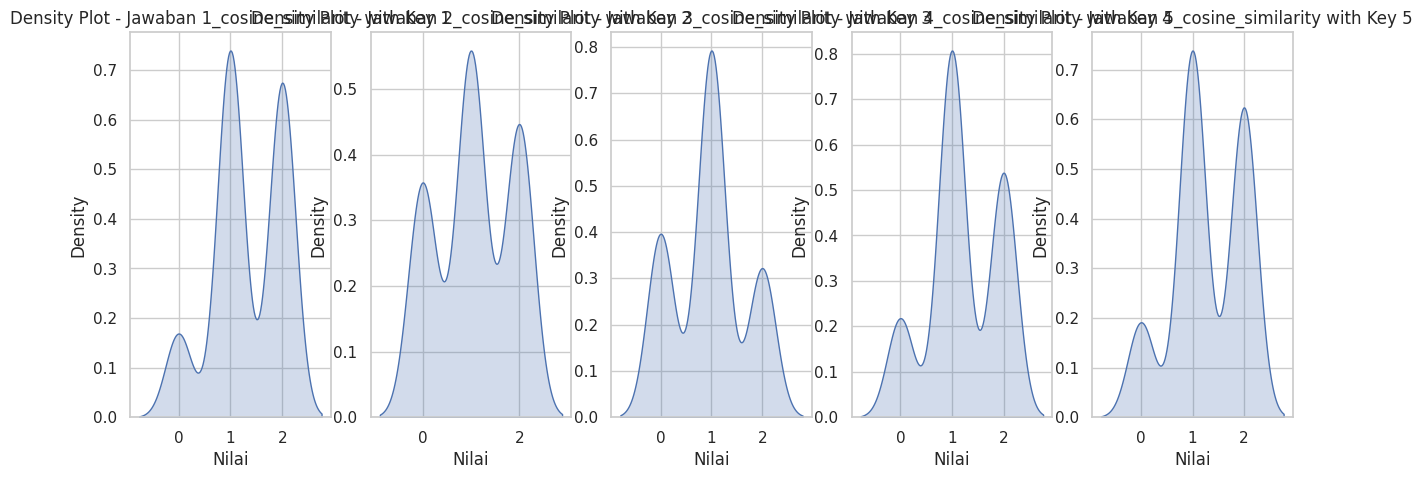

In [42]:
density(cosine_3label)

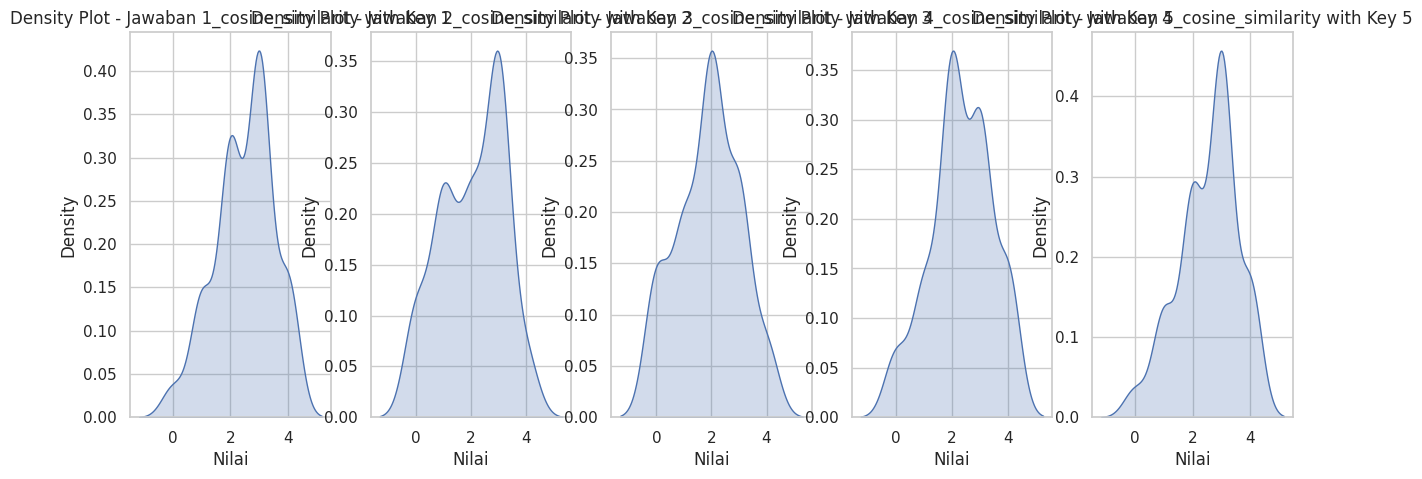

In [43]:
density(cosine_5label)

#Pengujian konsistensi data nilai dosen

Perlakuan disini untuk membandingkan antara data dosen dan data nilai hasil cosine simiiarity. Hasil dari perbandingan akan menunjukkan seberapa konsisten nilai dosen terhadap nilai cosine similiarity.

In [44]:
data_nilai_dosen=dataset[['Nilai No 1','Nilai No 2','Nilai No 3','Nilai No 4','Nilai No 5']].copy()
data_nilai_dosen.head()

,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5
0,16.0,30.0,5.0,10.0,10.0
1,16.0,30.0,5.0,5.0,2.0
2,20.0,25.0,5.0,10.0,2.0
3,20.0,25.0,10.0,10.0,10.0
4,20.0,25.0,10.0,10.0,10.0


In [45]:
#DATA COSINE
hasil_cosine=cosine_similarity_df.copy()
hasil_cosine_large=cosine_similarity_df_large.copy()

In [46]:
hasil_cosine.columns = ['Nilai No 1', 'Nilai No 2', 'Nilai No 3', 'Nilai No 4', 'Nilai No 5']
hasil_cosine_large.columns = ['Nilai No 1', 'Nilai No 2', 'Nilai No 3', 'Nilai No 4', 'Nilai No 5']
hasil_cosine

,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5
0,0.577533,0.608306,0.639284,0.663640,0.661245
1,0.569011,0.678768,0.663640,0.621537,0.704425
2,0.631770,0.541666,0.575885,0.634799,0.537217
3,0.666071,0.651561,0.622750,0.669044,0.628179
4,0.634144,0.672205,0.623316,0.659537,0.660689
...,...,...,...,...,...
117,0.666065,0.606003,0.484294,0.580250,0.617614
118,0.699733,0.680137,0.565149,0.563263,0.584094
119,0.683946,0.693846,0.665616,0.618779,0.763024
120,0.640124,0.704459,0.811312,0.674415,0.772866


In [47]:
hasil_cosine.describe()#hasil cosine -1,1

,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5
count,122.000000,122.000000,122.000000,122.000000,122.000000
mean,0.603821,0.601530,0.605221,0.609217,0.603150
std,0.092719,0.080054,0.092834,0.080962,0.085189
min,0.322414,0.418351,0.416422,0.390084,0.344488
25%,0.540832,0.532911,0.537765,0.554690,0.564866
50%,0.611885,0.614861,0.615052,0.612211,0.610766
75%,0.669721,0.664104,0.663551,0.666455,0.660527
max,0.792528,0.774064,0.811312,0.776912,0.772866


In [48]:
def min_max_scaling(data):
    nilai_min = data.min()
    nilai_max = data.max()
    return (data - nilai_min) / (nilai_max - nilai_min)

# Lakukan normalisasi pada data_dosen
data_dosen_nilai_normalized = min_max_scaling(data_nilai_dosen)
data_dosen_nilai_normalized.describe()

,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5
count,122.000000,122.000000,122.000000,122.000000,122.000000
mean,0.880123,0.784153,0.430738,0.532787,0.336066
std,0.193781,0.198350,0.138982,0.500981,0.474310
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.833333,0.400000,0.000000,0.000000
50%,1.000000,0.833333,0.500000,1.000000,0.000000
75%,1.000000,0.833333,0.500000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Kalkulasi selisih antara hasil similarity dan data nilai dosen
absolute_error = abs( hasil_cosine-data_dosen_nilai_normalized)

# Calculate the Mean Absolute Error (MAE)
mae_normalized = absolute_error.mean()

print("Mean Absolute Error (MAE):\n", mae_normalized)

Mean Absolute Error (MAE):
 Nilai No 1    0.317699
Nilai No 2    0.247137
Nilai No 3    0.189718
Nilai No 4    0.488232
Nilai No 5    0.526061
dtype: float64


In [52]:
data_embeddings

,Jawaban Pertanyaan 1_baseembeddings,Jawaban Pertanyaan 2_baseembeddings,Jawaban Pertanyaan 3_baseembeddings,Jawaban Pertanyaan 4_baseembeddings,Jawaban Pertanyaan 5_baseembeddings,Jawaban Pertanyaan 1_largeembeddings,Jawaban Pertanyaan 2_largeembeddings,Jawaban Pertanyaan 3_largeembeddings,Jawaban Pertanyaan 4_largeembeddings,Jawaban Pertanyaan 5_largeembeddings
0,"[[0.08289566, 0.45951188, -0.3838016, 0.607364...","[[0.29561424, 0.7802181, -0.40219483, 0.119968...","[[0.25740772, 1.5627832, -0.40481693, -0.06402...","[[0.26494494, 0.8439405, -0.35995904, -0.06093...","[[-0.006799561, 0.25844342, -0.70461345, 0.424...","[[-0.69947886, 0.2019074, -0.108471945, -0.503...","[[0.03321308, 0.8515266, -0.029077724, 0.30783...","[[-0.5795052, 0.6354167, -0.60755384, -0.30895...","[[-0.41377977, 0.563914, -0.24299102, -0.57869...","[[-0.49219728, 0.69151133, -0.43195575, 0.0900..."
1,"[[0.07360809, 0.3244851, -0.13964906, -0.20914...","[[0.17076176, 0.5558343, -0.55236375, -0.30357...","[[0.04318496, 1.0633637, -0.12824158, 0.029843...","[[0.17076996, 0.70511496, 0.09638424, 0.031118...","[[0.84722763, 0.67795634, -0.027800508, 0.2467...","[[-0.3651479, 0.45632735, -0.42656186, -0.5649...","[[-0.10327922, 0.65234995, -0.53979343, -0.313...","[[-0.46412712, 0.5510267, -0.5945271, -0.50795...","[[-0.32438198, 0.74828404, -0.30098176, -0.305...","[[-0.501884, 0.79422235, -0.43804383, -0.58692..."
2,"[[0.22087596, 0.6805589, -0.52232045, 0.154235...","[[0.6261127, 1.0489895, -0.28121686, -0.238629...","[[0.09123624, 0.89150155, -0.4304699, 0.061347...","[[0.20752893, 0.41868618, -0.20654047, -0.0713...","[[-0.26592478, 0.87117743, -0.3713899, -0.6502...","[[-0.3811749, 0.5482586, -0.49092674, -0.45918...","[[0.079796456, 0.36221308, -0.48819426, -0.174...","[[-0.5114332, 0.6604913, -0.37334794, -0.38698...","[[-0.47275415, 0.5945607, -0.5529247, -0.30427...","[[-0.14719608, 0.88879865, -0.3543862, -0.1648..."
3,"[[0.25020558, 1.2602192, 0.006028183, -0.59501...","[[0.8887159, 0.3681559, -0.3145789, -0.3466869...","[[-0.032441057, 0.87869215, -0.45488283, -0.02...","[[0.042009324, 0.87986183, -0.17425866, -0.123...","[[-0.4768136, 0.27476957, -0.07885745, -0.3413...","[[-0.107585125, 0.2892986, -0.19756916, -0.697...","[[1.0414124e-05, 0.372436, -0.17243855, -0.132...","[[-0.30261216, 0.24578005, -0.50503165, -0.364...","[[-0.5869285, -0.11611729, -0.27497366, -0.557...","[[-0.06860746, 0.33900112, -0.5290674, 0.19375..."
4,"[[0.07792464, 0.7622254, -0.51291233, 0.122522...","[[0.5182054, 0.46823683, -0.45804617, -0.11862...","[[0.3028027, 1.1296003, -0.3174644, -0.0707204...","[[-0.030740313, 0.94489276, -0.4664404, 0.0068...","[[0.17181824, 0.24580528, -0.6278602, 0.264950...","[[-0.31801668, 0.39564952, -0.5760389, -0.4199...","[[-0.20292112, 0.48062682, -0.42353195, 0.0225...","[[-0.41547665, 0.59156525, -0.51206553, -0.168...","[[-0.3209721, 0.74699646, -0.24024495, -0.4871...","[[-0.25083163, 0.7476378, -0.475002, -0.121688..."
...,...,...,...,...,...,...,...,...,...,...
117,"[[0.0819325, 0.5588237, -0.17366853, 0.1678664...","[[0.21676928, 1.0502118, -0.5034295, 0.1539884...","[[0.2171739, 1.1295722, -0.578281, 0.17809097,...","[[-0.0976344, 0.81365603, -0.4346658, -0.19830...","[[-0.24440175, 0.17659165, -0.09494426, 0.1503...","[[-0.36467323, 0.42421648, -0.36001706, -0.469...","[[-0.21430697, 0.8905834, -0.1915897, 0.300828...","[[-0.43274328, 0.9139024, -0.07347833, -0.0157...","[[-0.5045798, 0.6792583, -0.3942692, -0.338065...","[[0.06429258, 0.76763386, -0.3229331, 0.172703..."
118,"[[0.17497297, 0.1702196, -0.13452502, 0.000468...","[[0.4758626, 0.40940952, -0.4845608, -0.176320...","[[0.08311413, 0.6971179, -0.54646343, 0.007584...","[[0.46877974, 1.0179076, -0.19713455, 0.046463...","[[-0.02369456, 0.5221234, 0.044982992, -0.6561...","[[-0.44272268, 0.5262057, -0.48184037, -0.5877...","[[-0.0013624531, 0.4059496, -0.4193539, 0.0137...","[[-0.5697133, 0.49084485, -0.6462428, -0.46493...","[[-0.4961342, 0.63021255, -0.205577

#PEMODELAN


##BiLTSM

###IMPORT LIBRARY

In [56]:
import numpy as np
from hyperopt import hp, tpe, fmin
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional,LSTM, Dense, Dropout,LeakyReLU, GlobalAveragePooling1D,GlobalMaxPooling1D, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import LSTM, Dropout, GlobalAveragePooling1D, Dense, GRU
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

In [57]:
!pip install keras
!pip install keras-tuner
!pip install tensorflow
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.5 MB/s eta 0:00:00


###Konfigurasi LSTM-Max


* LSTM 128
* MaxPooling
* 2 Layer
* Dropout=0.2
* Learning Rate = 0.0001
* Batch size=128
* Epochs = 100





####3 Rentang


In [59]:
def crossval_3_fitur(nomor, variasi_BERT,jumlah_label):
    # Fungsi untuk membuat model LSTM
    def create_lstm_model(input_shape):
        model = Sequential()
        model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
        model.add(GlobalMaxPooling1D())
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(jumlah_label, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
        return model

    # Data fitur dan target
    column = f"Jawaban Pertanyaan {nomor}_{variasi_BERT}embeddings"
    X = data_embeddings[column].values
    target = f'Jawaban {nomor}_cosine_similarity with Key {nomor}'
    if jumlah_label==3:
      y = cosine_3label[target].values
    else:
      y = cosine_5label[target].values
    panjang_sekuens = len(X[0])
    # Padding data fitur
    X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

    # Reshape data fitur menjadi 2D
    X = X.reshape(X.shape[0], -1)

    # Initialize randomsampling
    randomsampling = RandomOverSampler(random_state=42)

    # Perform oversampling
    X_resampled, y_resampled = randomsampling.fit_resample(X, y)

    # Reshape kembali data fitur menjadi 3D
    X_resampled = X_resampled.reshape(X_resampled.shape[0], panjang_sekuens, -1)

    # Initialize StratifiedKFold with the desired number of folds (e.g., 5)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store accuracy and history for each fold
    fold_accuracies = []
    all_histories = []
    all_y_true = []
    all_y_pred = []
    all_val_accuracies = []  # List to store validation accuracy for each fold

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kfold.split(X_resampled, y_resampled), 1):
        print(f"Fold {fold}")

        X_train, X_val = X_resampled[train_index], X_resampled[test_index]
        y_train, y_val = y_resampled[train_index], y_resampled[test_index]

        model = create_lstm_model(input_shape=(X_resampled.shape[1], X_resampled.shape[2]))

        # Pretraining: Fit model with higher learning rate (pretraining rate)
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val, y_val))  # Include validation data here

        # Evaluate model on validation data for this fold
        y_val_pred = model.predict(X_val)
        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        fold_accuracy = accuracy_score(y_val, y_val_pred_labels)
        fold_accuracies.append(fold_accuracy)

        # Store val_accuracy for this fold
        all_val_accuracies.append(history.history['val_accuracy'])

        all_histories.append(history)
        all_y_true.extend(y_val)
        all_y_pred.extend(y_val_pred_labels)

    # Calculate and print cross-validation results
    print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(fold_accuracies) * 100, np.std(fold_accuracies) * 100))

    # Plot average training and validation loss over all folds
    avg_train_loss = np.mean([history.history['loss'] for history in all_histories], axis=0)
    avg_val_loss = np.mean([history.history['val_loss'] for history in all_histories], axis=0)
    plt.plot(avg_train_loss, label='Average Training Loss')
    plt.plot(avg_val_loss, label='Average Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot average training and validation accuracy over all folds
    avg_train_accuracy = np.mean([history.history['accuracy'] for history in all_histories], axis=0)
    avg_val_accuracy = np.mean(all_val_accuracies, axis=0)
    plt.plot(avg_train_accuracy, label='Average Training Accuracy')
    plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Calculate and print precision, recall, and f1-score macro
    precision, recall, f1_score, _ = precision_recall_fscore_support(all_y_true, all_y_pred, average='macro')
    print(f"Precision (macro): {precision}")
    print(f"Recall (macro): {recall}")
    print(f"F1-score (macro): {f1_score}")

    return model

In [ ]:
def crossval_3_fitur(nomor, variasi_BERT,jumlah_label):
    # Fungsi untuk membuat model LSTM
    def create_lstm_model(input_shape):
        model = Sequential()
        model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
        model.add(GlobalMaxPooling1D())
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(jumlah_label, activation='sigmoid'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
        return model

    # Data fitur dan target
    column = f"Jawaban Pertanyaan {nomor}_{variasi_BERT}embeddings"
    X = data_embeddings[column].values
    target = f'Jawaban {nomor}_cosine_similarity with Key {nomor}'
    if jumlah_label==3:
      y = cosine_3label[target].values
    else:
      y = cosine_5label[target].values
    panjang_sekuens = len(X[0])
    # Padding data fitur
    X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

    # Reshape data fitur menjadi 2D
    X = X.reshape(X.shape[0], -1)

    # Initialize randomsampling
    randomsampling = RandomOverSampler(random_state=42)

    # Perform oversampling
    X_resampled, y_resampled = randomsampling.fit_resample(X, y)

    # Reshape kembali data fitur menjadi 3D
    X_resampled = X_resampled.reshape(X_resampled.shape[0], panjang_sekuens, -1)

    # Initialize StratifiedKFold with the desired number of folds (e.g., 5)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store accuracy and history for each fold
    fold_accuracies = []
    all_histories = []
    all_y_true = []
    all_y_pred = []
    all_val_accuracies = []  # List to store validation accuracy for each fold

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kfold.split(X_resampled, y_resampled), 1):
        print(f"Fold {fold}")

        X_train, X_val = X_resampled[train_index], X_resampled[test_index]
        y_train, y_val = y_resampled[train_index], y_resampled[test_index]

        model = create_lstm_model(input_shape=(X_resampled.shape[1], X_resampled.shape[2]))

        # Pretraining: Fit model with higher learning rate (pretraining rate)
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val, y_val))  # Include validation data here

        # Evaluate model on validation data for this fold
        y_val_pred = model.predict(X_val)
        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        fold_accuracy = accuracy_score(y_val, y_val_pred_labels)
        fold_accuracies.append(fold_accuracy)

        # Store val_accuracy for this fold
        all_val_accuracies.append(history.history['val_accuracy'])

        all_histories.append(history)
        all_y_true.extend(y_val)
        all_y_pred.extend(y_val_pred_labels)

    # Calculate and print cross-validation results
    print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(fold_accuracies) * 100, np.std(fold_accuracies) * 100))

    # Plot average training and validation loss over all folds
    avg_train_loss = np.mean([history.history['loss'] for history in all_histories], axis=0)
    avg_val_loss = np.mean([history.history['val_loss'] for history in all_histories], axis=0)
    plt.plot(avg_train_loss, label='Average Training Loss')
    plt.plot(avg_val_loss, label='Average Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot average training and validation accuracy over all folds
    avg_train_accuracy = np.mean([history.history['accuracy'] for history in all_histories], axis=0)
    avg_val_accuracy = np.mean(all_val_accuracies, axis=0)
    plt.plot(avg_train_accuracy, label='Average Training Accuracy')
    plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Calculate and print precision, recall, and f1-score macro
    precision, recall, f1_score, _ = precision_recall_fscore_support(all_y_true, all_y_pred, average='macro')
    print(f"Precision (macro): {precision}")
    print(f"Recall (macro): {recall}")
    print(f"F1-score (macro): {f1_score}")

    return model

In [ ]:
crossval_3_fitur(nomor=1, variasi_BERT='base',jumlag_label=3)

In [ ]:
crossval_3_fitur(nomor=2, variasi_BERT='base',jumlag_label=3)

In [ ]:
crossval_3_fitur(nomor=3, variasi_BERT='base',jumlag_label=3)

In [ ]:
crossval_3_fitur(nomor=4, variasi_BERT='base',jumlah_label=3)

In [ ]:
crossval_3_fitur(nomor=5, variasi_BERT='base',jumlah_label=3)

In [ ]:
crossval_3_fitur(nomor=1, variasi_BERT='large',jumlah_label=3)

In [ ]:
crossval_3_fitur(nomor=2, variasi_BERT='large',jumlah_label=3)


In [ ]:
crossval_3_fitur(nomor=3, variasi_BERT='large',jumlah_label=3)

In [ ]:
crossval_3_fitur(nomor=4, variasi_BERT='large',jumlah_label=3)

In [ ]:
crossval_3_fitur(nomor=5, variasi_BERT='large',jumlah_label=3)

####5 Rentang

In [ ]:
def crossval_5_fitur(nomor, variasi_BERT):
    # Fungsi untuk membuat model LSTM
    def create_lstm_model(input_shape):
        model = Sequential()
        model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
        model.add(GlobalMaxPooling1D())
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(5, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
        return model

    # Data fitur dan target
    column = f"Jawaban Pertanyaan {nomor}_{variasi_BERT}embeddings"
    X = data_embeddings[column].values
    target = f'Jawaban {nomor}_cosine_similarity with Key {nomor}'
    y = cosine_5label[target].values
    panjang_sekuens = len(X[0])
    # Padding data fitur
    X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

    # Reshape data fitur menjadi 2D
    X = X.reshape(X.shape[0], -1)

    # Initialize randomsampling
    randomsampling = RandomOverSampler(random_state=42)

    # Perform oversampling
    X_resampled, y_resampled = randomsampling.fit_resample(X, y)

    # Reshape kembali data fitur menjadi 3D
    X_resampled = X_resampled.reshape(X_resampled.shape[0], panjang_sekuens, -1)

    # Initialize StratifiedKFold with the desired number of folds (e.g., 5)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store accuracy and history for each fold
    fold_accuracies = []
    all_histories = []
    all_y_true = []
    all_y_pred = []
    all_val_accuracies = []  # List to store validation accuracy for each fold

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kfold.split(X_resampled, y_resampled), 1):
        print(f"Fold {fold}")

        X_train, X_val = X_resampled[train_index], X_resampled[test_index]
        y_train, y_val = y_resampled[train_index], y_resampled[test_index]

        model = create_lstm_model(input_shape=(X_resampled.shape[1], X_resampled.shape[2]))

        # Pretraining: Fit model with higher learning rate (pretraining rate)
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val, y_val))  # Include validation data here

        # Evaluate model on validation data for this fold
        y_val_pred = model.predict(X_val)
        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        fold_accuracy = accuracy_score(y_val, y_val_pred_labels)
        fold_accuracies.append(fold_accuracy)

        # Store val_accuracy for this fold
        all_val_accuracies.append(history.history['val_accuracy'])

        all_histories.append(history)
        all_y_true.extend(y_val)
        all_y_pred.extend(y_val_pred_labels)

    # Calculate and print cross-validation results
    print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(fold_accuracies) * 100, np.std(fold_accuracies) * 100))

    # Plot average training and validation loss over all folds
    avg_train_loss = np.mean([history.history['loss'] for history in all_histories], axis=0)
    avg_val_loss = np.mean([history.history['val_loss'] for history in all_histories], axis=0)
    plt.plot(avg_train_loss, label='Average Training Loss')
    plt.plot(avg_val_loss, label='Average Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot average training and validation accuracy over all folds
    avg_train_accuracy = np.mean([history.history['accuracy'] for history in all_histories], axis=0)
    avg_val_accuracy = np.mean(all_val_accuracies, axis=0)  # Take the average of val_accuracies for each fold
    plt.plot(avg_train_accuracy, label='Average Training Accuracy')
    plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Calculate and print precision, recall, and f1-score macro
    precision, recall, f1_score, _ = precision_recall_fscore_support(all_y_true, all_y_pred, average='macro')
    print(f"Precision (macro): {precision}")
    print(f"Recall (macro): {recall}")
    print(f"F1-score (macro): {f1_score}")

    return model

In [ ]:
# Usage example
crossval_5_fitur(nomor=1, variasi_BERT='base')

In [ ]:
crossval_5_fitur(nomor=1, variasi_BERT='base')

In [ ]:
crossval_5_fitur(nomor=2, variasi_BERT='base')

In [ ]:
crossval_5_fitur(nomor=3, variasi_BERT='base')

In [ ]:
crossval_5_fitur(nomor=4, variasi_BERT='base')

In [ ]:
crossval_5_fitur(nomor=5, variasi_BERT='base')

In [ ]:
crossval_5_fitur(nomor=1, variasi_BERT='large')

In [ ]:
crossval_5_fitur(nomor=2, variasi_BERT='large')

In [ ]:
crossval_5_fitur(nomor=3, variasi_BERT='large')

In [ ]:
crossval_5_fitur(nomor=4, variasi_BERT='large')

In [ ]:
crossval_5_fitur(nomor=5, variasi_BERT='large')

###Konfigurasi BiLSTM-Max

####3 Label

In [61]:
def crossval_3_fitur_BiLSTM(nomor, variasi_BERT):
    # Fungsi untuk membuat model LSTM
    def create_lstm_model(input_shape):
        model = Sequential()
        # model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
        model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape))
        model.add(GlobalMaxPooling1D())
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(3, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
        return model

    # Data fitur dan target
    column = f"Jawaban Pertanyaan {nomor}_{variasi_BERT}embeddings"
    X = data_embeddings[column].values
    target = f'Jawaban {nomor}_cosine_similarity with Key {nomor}'
    y = cosine_3label[target].values
    panjang_sekuens = len(X[0])
    # Padding data fitur
    X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

    # Reshape data fitur menjadi 2D
    X = X.reshape(X.shape[0], -1)

    # Initialize randomsampling
    randomsampling = RandomOverSampler(random_state=42)

    # Perform oversampling
    X_resampled, y_resampled = randomsampling.fit_resample(X, y)

    # Reshape kembali data fitur menjadi 3D
    X_resampled = X_resampled.reshape(X_resampled.shape[0], panjang_sekuens, -1)

    # Initialize StratifiedKFold with the desired number of folds (e.g., 5)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store accuracy and history for each fold
    fold_accuracies = []
    all_histories = []
    all_y_true = []
    all_y_pred = []
    all_val_accuracies = []  # List to store validation accuracy for each fold

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kfold.split(X_resampled, y_resampled), 1):
        print(f"Fold {fold}")

        X_train, X_val = X_resampled[train_index], X_resampled[test_index]
        y_train, y_val = y_resampled[train_index], y_resampled[test_index]

        model = create_lstm_model(input_shape=(X_resampled.shape[1], X_resampled.shape[2]))

        # Pretraining: Fit model with higher learning rate (pretraining rate)
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val, y_val))  # Include validation data here

        # Evaluate model on validation data for this fold
        y_val_pred = model.predict(X_val)
        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        fold_accuracy = accuracy_score(y_val, y_val_pred_labels)
        fold_accuracies.append(fold_accuracy)

        # Store val_accuracy for this fold
        all_val_accuracies.append(history.history['val_accuracy'])

        all_histories.append(history)
        all_y_true.extend(y_val)
        all_y_pred.extend(y_val_pred_labels)

    # Calculate and print cross-validation results
    print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(fold_accuracies) * 100, np.std(fold_accuracies) * 100))

    # Plot average training and validation loss over all folds
    avg_train_loss = np.mean([history.history['loss'] for history in all_histories], axis=0)
    avg_val_loss = np.mean([history.history['val_loss'] for history in all_histories], axis=0)
    plt.plot(avg_train_loss, label='Average Training Loss')
    plt.plot(avg_val_loss, label='Average Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot average training and validation accuracy over all folds
    avg_train_accuracy = np.mean([history.history['accuracy'] for history in all_histories], axis=0)
    avg_val_accuracy = np.mean(all_val_accuracies, axis=0)  # Take the average of val_accuracies for each fold
    plt.plot(avg_train_accuracy, label='Average Training Accuracy')
    plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Calculate and print precision, recall, and f1-score macro
    precision, recall, f1_score, _ = precision_recall_fscore_support(all_y_true, all_y_pred, average='macro')
    print(f"Precision (macro): {precision}")
    print(f"Recall (macro): {recall}")
    print(f"F1-score (macro): {f1_score}")

    return model

# Usage example


Fold 1
2/2 [==============================] - 1s 6ms/step
Fold 2
2/2 [==============================] - 1s 7ms/step
Fold 3
2/2 [==============================] - 1s 5ms/step
Fold 4
2/2 [==============================] - 1s 8ms/step
Fold 5


2/2 [==============================] - 1s 7ms/step
Cross-Validation Accuracy: 73.13% (+/- 5.22%)


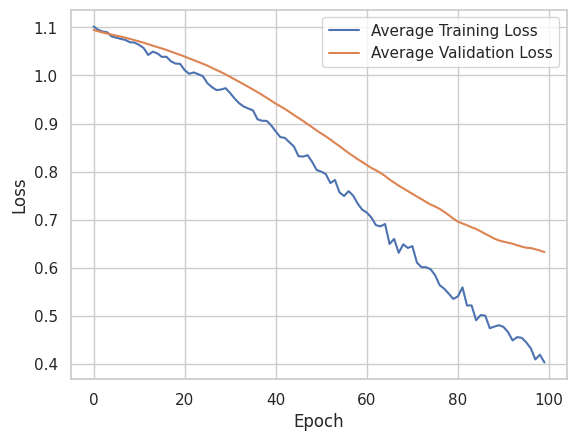

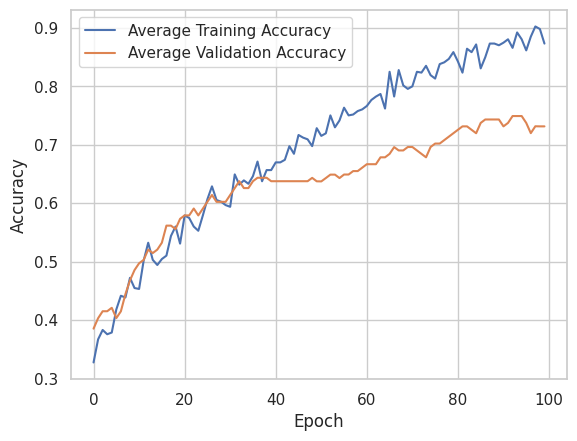

Precision (macro): 0.7214590964590964
Recall (macro): 0.7309941520467836
F1-score (macro): 0.724991204568212


In [62]:
crossval_3_fitur_BiLSTM(1,'base')

Fold 1


1/1 [==============================] - 1s 553ms/step
Fold 2
1/1 [==============================] - 1s 897ms/step
Fold 3
1/1 [==============================] - 1s 638ms/step
Fold 4
1/1 [==============================] - 1s 536ms/step
Fold 5
1/1 [==============================] - 1s 554ms/step
Cross-Validation Accuracy: 56.67% (+/- 2.98%)


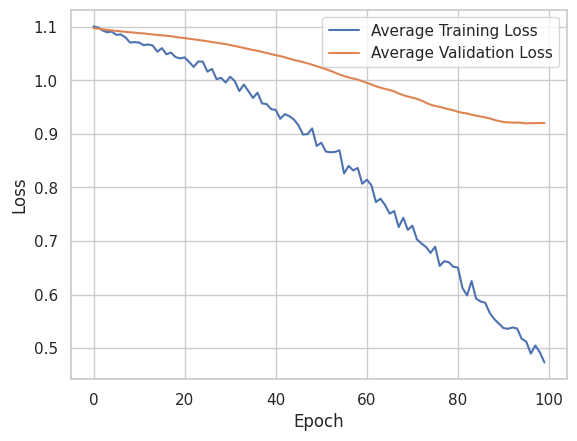

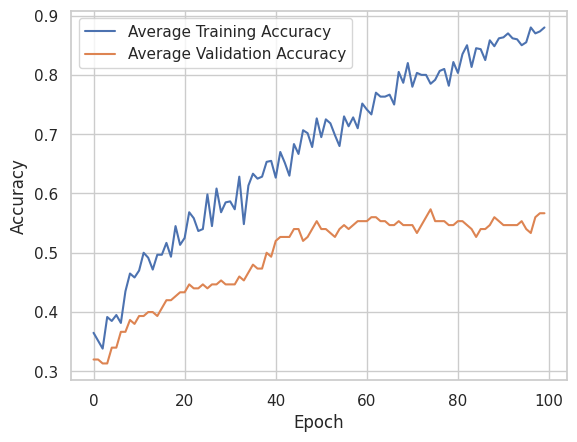

Precision (macro): 0.5666022544283414
Recall (macro): 0.5666666666666668
F1-score (macro): 0.565982905982906


In [63]:
crossval_3_fitur_BiLSTM(2,'base')

Fold 1
2/2 [==============================] - 1s 12ms/step
Fold 2
2/2 [==============================] - 1s 7ms/step
Fold 3
2/2 [==============================] - 1s 6ms/step
Fold 4
2/2 [==============================] - 1s 7ms/step
Fold 5
2/2 [==============================] - 1s 5ms/step
Cross-Validation Accuracy: 74.95% (+/- 6.62%)


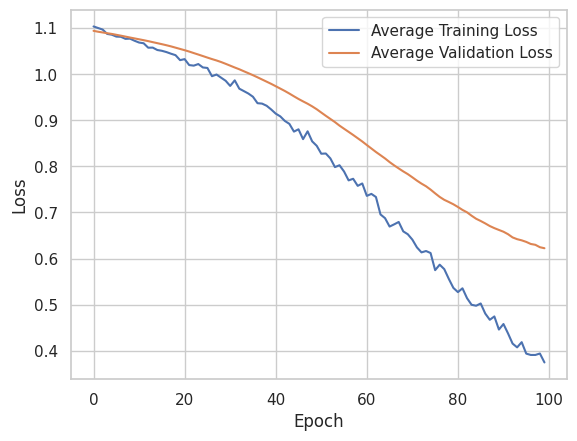

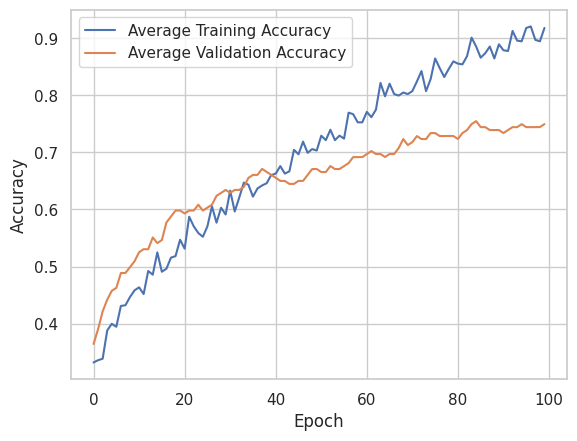

Precision (macro): 0.7506699649556792
Recall (macro): 0.75
F1-score (macro): 0.7442315336497223


In [64]:
crossval_3_fitur_BiLSTM(3,'base')

Fold 1
2/2 [==============================] - 1s 9ms/step
Fold 2
2/2 [==============================] - 1s 7ms/step
Fold 3
2/2 [==============================] - 1s 7ms/step
Fold 4
2/2 [==============================] - 1s 8ms/step
Fold 5
2/2 [==============================] - 1s 6ms/step
Cross-Validation Accuracy: 69.84% (+/- 5.89%)


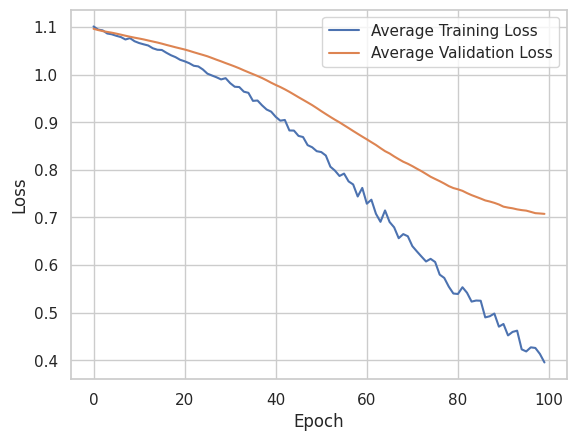

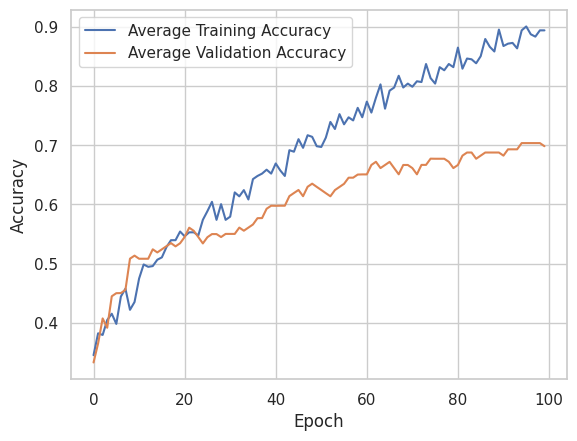

Precision (macro): 0.689766081871345
Recall (macro): 0.6984126984126985
F1-score (macro): 0.6878831394343985


In [65]:
crossval_3_fitur_BiLSTM(4,'base')

Fold 1
2/2 [==============================] - 1s 7ms/step
Fold 2
2/2 [==============================] - 1s 5ms/step
Fold 3
2/2 [==============================] - 1s 6ms/step
Fold 4
2/2 [==============================] - 1s 7ms/step
Fold 5
2/2 [==============================] - 1s 5ms/step
Cross-Validation Accuracy: 71.85% (+/- 4.85%)


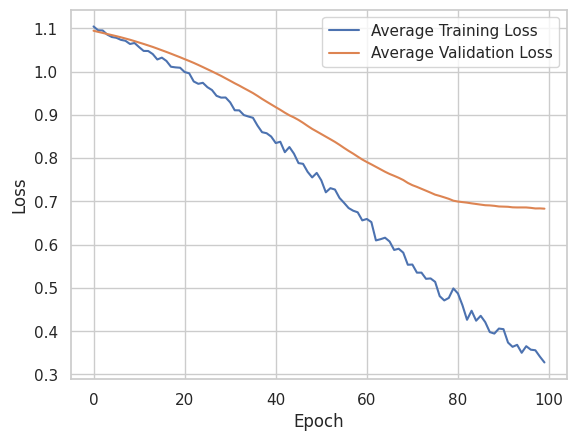

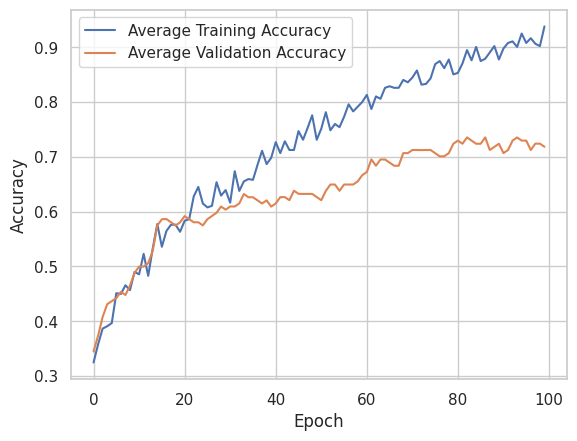

Precision (macro): 0.7119382409704991
Recall (macro): 0.7183908045977011
F1-score (macro): 0.7141842150316727


In [66]:
crossval_3_fitur_BiLSTM(5,'base')

Fold 1
2/2 [==============================] - 1s 6ms/step
Fold 2
2/2 [==============================] - 1s 7ms/step
Fold 3
2/2 [==============================] - 1s 7ms/step
Fold 4
2/2 [==============================] - 1s 7ms/step
Fold 5
2/2 [==============================] - 1s 7ms/step
Cross-Validation Accuracy: 57.31% (+/- 3.95%)


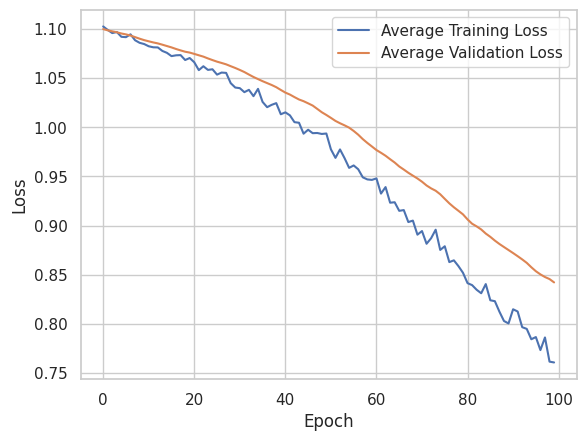

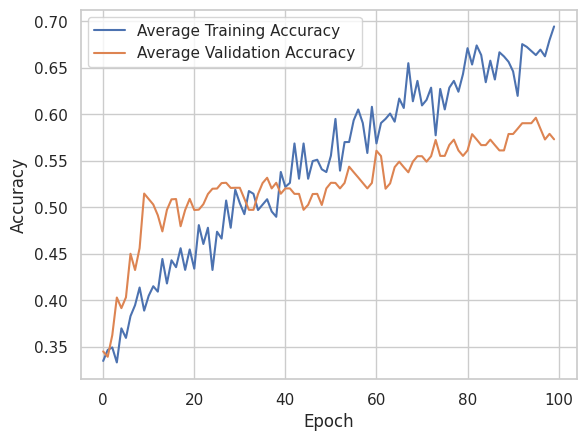

Precision (macro): 0.5594315245478036
Recall (macro): 0.5730994152046783
F1-score (macro): 0.5611168091168092


In [67]:
crossval_3_fitur_BiLSTM(1,'large')

Fold 1
1/1 [==============================] - 1s 558ms/step
Fold 2
1/1 [==============================] - 1s 572ms/step
Fold 3
1/1 [==============================] - 1s 581ms/step
Fold 4
1/1 [==============================] - 1s 532ms/step
Fold 5
1/1 [==============================] - 1s 621ms/step
Cross-Validation Accuracy: 44.00% (+/- 6.46%)


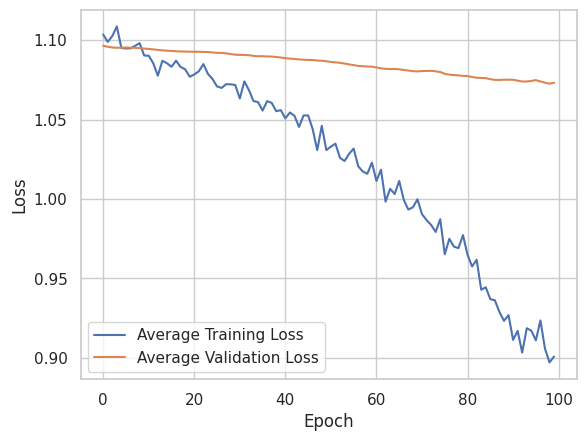

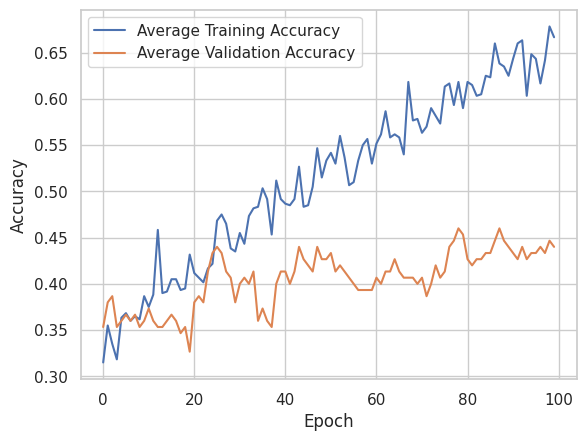

Precision (macro): 0.4421931735657226
Recall (macro): 0.44
F1-score (macro): 0.44043572373431666


In [68]:
crossval_3_fitur_BiLSTM(2,'large')

Fold 1
2/2 [==============================] - 1s 7ms/step
Fold 2
2/2 [==============================] - 1s 6ms/step
Fold 3
2/2 [==============================] - 1s 7ms/step
Fold 4
2/2 [==============================] - 1s 6ms/step
Fold 5
2/2 [==============================] - 1s 9ms/step
Cross-Validation Accuracy: 57.84% (+/- 5.35%)


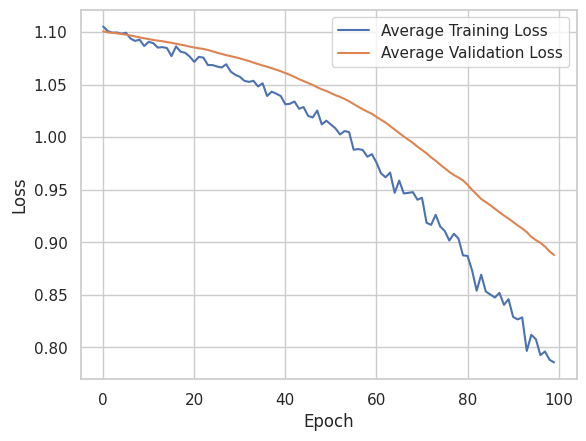

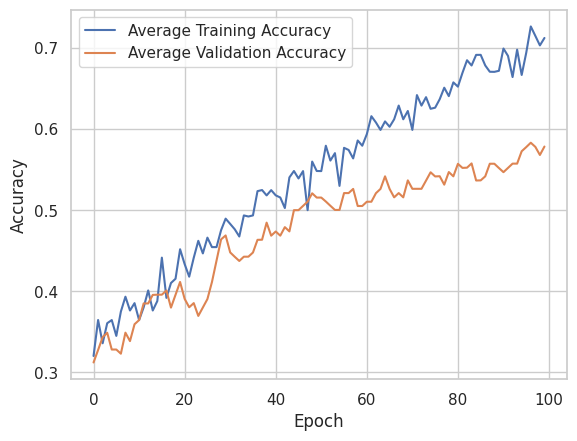

Precision (macro): 0.5634988134988135
Recall (macro): 0.578125
F1-score (macro): 0.5682556157818527


In [69]:
crossval_3_fitur_BiLSTM(3,'large')

Fold 1
2/2 [==============================] - 1s 7ms/step
Fold 2
2/2 [==============================] - 1s 6ms/step
Fold 3
2/2 [==============================] - 1s 7ms/step
Fold 4
2/2 [==============================] - 1s 7ms/step
Fold 5
2/2 [==============================] - 1s 6ms/step
Cross-Validation Accuracy: 59.27% (+/- 3.38%)


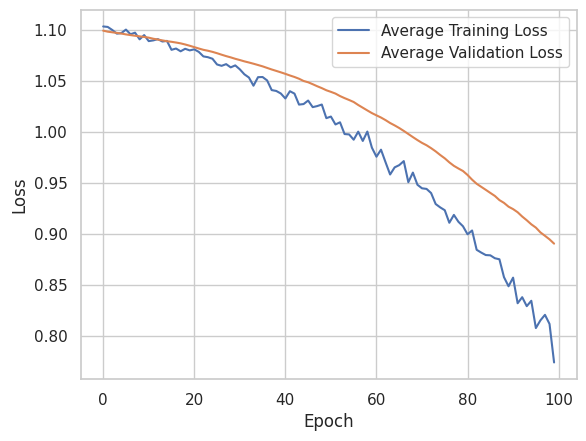

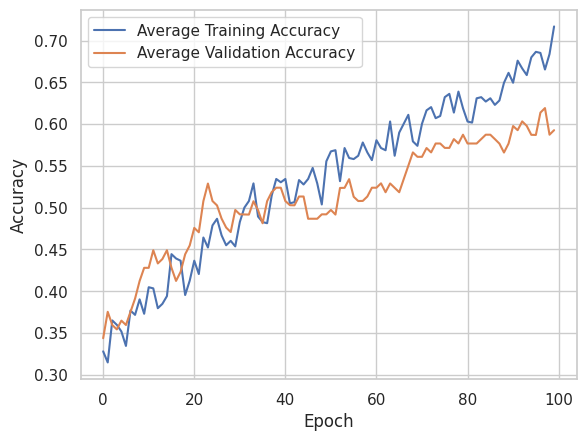

Precision (macro): 0.5803880803880803
Recall (macro): 0.5925925925925926
F1-score (macro): 0.5828256545658118


In [70]:
crossval_3_fitur_BiLSTM(4,'large')


Fold 1
2/2 [==============================] - 1s 6ms/step
Fold 2
2/2 [==============================] - 1s 7ms/step
Fold 3
2/2 [==============================] - 1s 6ms/step
Fold 4
2/2 [==============================] - 1s 7ms/step
Fold 5
2/2 [==============================] - 1s 5ms/step
Cross-Validation Accuracy: 57.48% (+/- 6.55%)


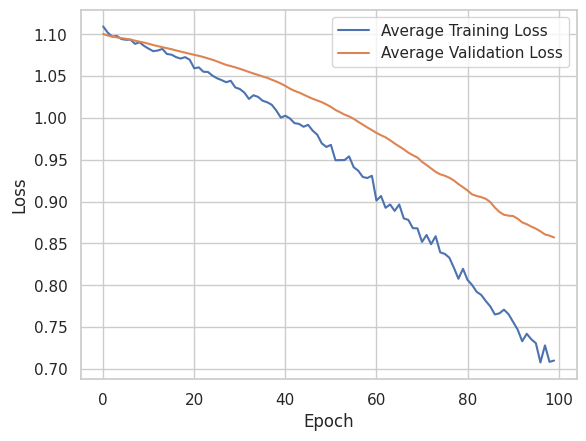

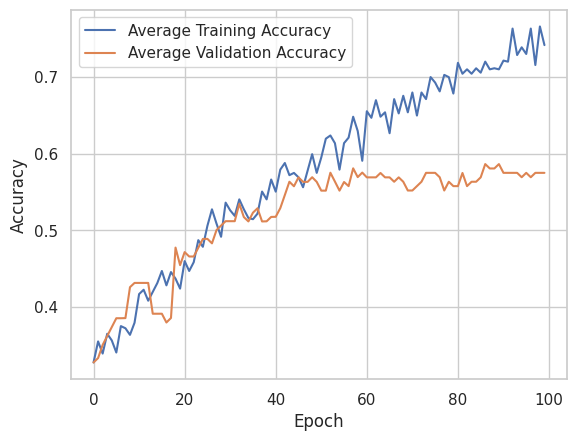

Precision (macro): 0.5554658108612619
Recall (macro): 0.5747126436781609
F1-score (macro): 0.5600689267692004


In [71]:
crossval_3_fitur_BiLSTM(5,'large')


####5 Label

In [72]:
def crossval_5_fitur_BiLSTM(nomor, variasi_BERT):
    # Fungsi untuk membuat model LSTM
    def create_lstm_model(input_shape):
        model = Sequential()
        model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape))
        model.add(GlobalMaxPooling1D())
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(5, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
        return model

    # Data fitur dan target
    column = f"Jawaban Pertanyaan {nomor}_{variasi_BERT}embeddings"
    X = data_embeddings[column].values
    target = f'Jawaban {nomor}_cosine_similarity with Key {nomor}'
    y = cosine_5label[target].values
    panjang_sekuens = len(X[0])
    # Padding data fitur
    X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

    # Reshape data fitur menjadi 2D
    X = X.reshape(X.shape[0], -1)

    # Initialize randomsampling
    randomsampling = RandomOverSampler(random_state=42)

    # Perform oversampling
    X_resampled, y_resampled = randomsampling.fit_resample(X, y)

    # Reshape kembali data fitur menjadi 3D
    X_resampled = X_resampled.reshape(X_resampled.shape[0], panjang_sekuens, -1)

    # Initialize StratifiedKFold with the desired number of folds (e.g., 5)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store accuracy and history for each fold
    fold_accuracies = []
    all_histories = []
    all_y_true = []
    all_y_pred = []
    all_val_accuracies = []  # List to store validation accuracy for each fold

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kfold.split(X_resampled, y_resampled), 1):
        print(f"Fold {fold}")

        X_train, X_val = X_resampled[train_index], X_resampled[test_index]
        y_train, y_val = y_resampled[train_index], y_resampled[test_index]

        model = create_lstm_model(input_shape=(X_resampled.shape[1], X_resampled.shape[2]))

        # Pretraining: Fit model with higher learning rate (pretraining rate)
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val, y_val))  # Include validation data here

        # Evaluate model on validation data for this fold
        y_val_pred = model.predict(X_val)
        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        fold_accuracy = accuracy_score(y_val, y_val_pred_labels)
        fold_accuracies.append(fold_accuracy)

        # Store val_accuracy for this fold
        all_val_accuracies.append(history.history['val_accuracy'])

        all_histories.append(history)
        all_y_true.extend(y_val)
        all_y_pred.extend(y_val_pred_labels)

    # Calculate and print cross-validation results
    print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(fold_accuracies) * 100, np.std(fold_accuracies) * 100))

    # Plot average training and validation loss over all folds
    avg_train_loss = np.mean([history.history['loss'] for history in all_histories], axis=0)
    avg_val_loss = np.mean([history.history['val_loss'] for history in all_histories], axis=0)
    plt.plot(avg_train_loss, label='Average Training Loss')
    plt.plot(avg_val_loss, label='Average Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot average training and validation accuracy over all folds
    avg_train_accuracy = np.mean([history.history['accuracy'] for history in all_histories], axis=0)
    avg_val_accuracy = np.mean(all_val_accuracies, axis=0)  # Take the average of val_accuracies for each fold
    plt.plot(avg_train_accuracy, label='Average Training Accuracy')
    plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Calculate and print precision, recall, and f1-score macro
    precision, recall, f1_score, _ = precision_recall_fscore_support(all_y_true, all_y_pred, average='macro')
    print(f"Precision (macro): {precision}")
    print(f"Recall (macro): {recall}")
    print(f"F1-score (macro): {f1_score}")

    return model

# Usage example


Fold 1
2/2 [==============================] - 1s 9ms/step
Fold 2
2/2 [==============================] - 1s 12ms/step
Fold 3
2/2 [==============================] - 1s 6ms/step
Fold 4
2/2 [==============================] - 1s 7ms/step
Fold 5
2/2 [==============================] - 1s 6ms/step
Cross-Validation Accuracy: 78.75% (+/- 8.06%)


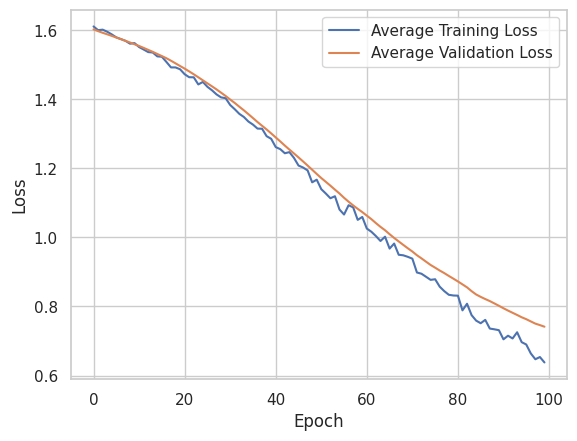

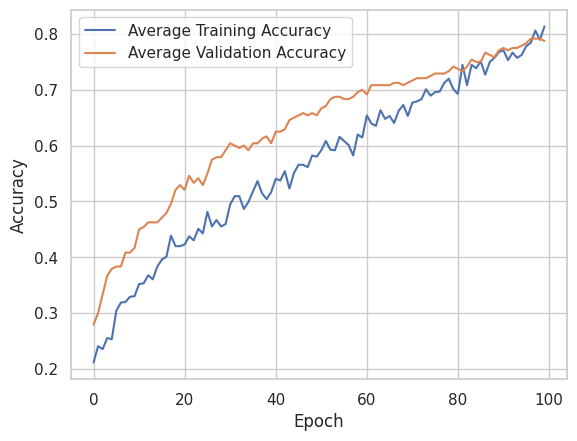

Precision (macro): 0.7737677527151211
Recall (macro): 0.7875
F1-score (macro): 0.7736653179790435


In [73]:
crossval_5_fitur_BiLSTM(1,'base')

Fold 1
2/2 [==============================] - 1s 7ms/step
Fold 2
2/2 [==============================] - 1s 7ms/step
Fold 3
2/2 [==============================] - 1s 8ms/step
Fold 4
2/2 [==============================] - 1s 7ms/step
Fold 5
2/2 [==============================] - 1s 7ms/step
Cross-Validation Accuracy: 77.83% (+/- 4.64%)


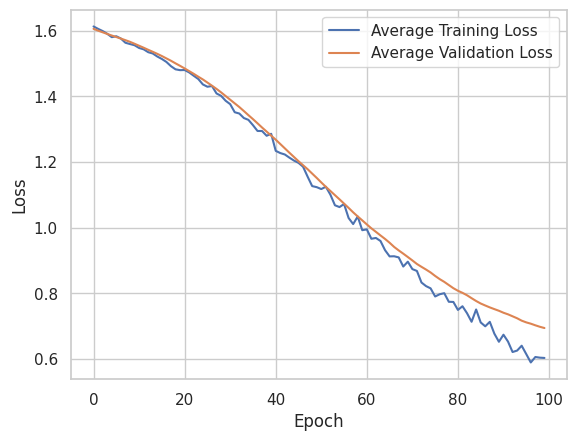

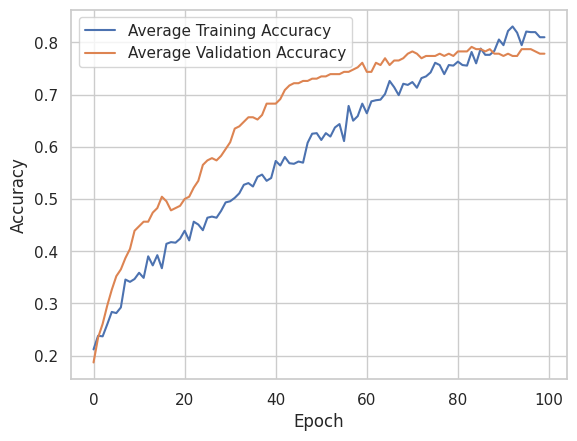

Precision (macro): 0.7722321818263398
Recall (macro): 0.7782608695652173
F1-score (macro): 0.7713511742757093


In [74]:
crossval_5_fitur_BiLSTM(2,'base')

Fold 1
2/2 [==============================] - 1s 12ms/step
Fold 2
2/2 [==============================] - 1s 6ms/step
Fold 3
2/2 [==============================] - 1s 6ms/step
Fold 4
2/2 [==============================] - 1s 8ms/step
Fold 5
2/2 [==============================] - 1s 7ms/step
Cross-Validation Accuracy: 69.09% (+/- 4.22%)


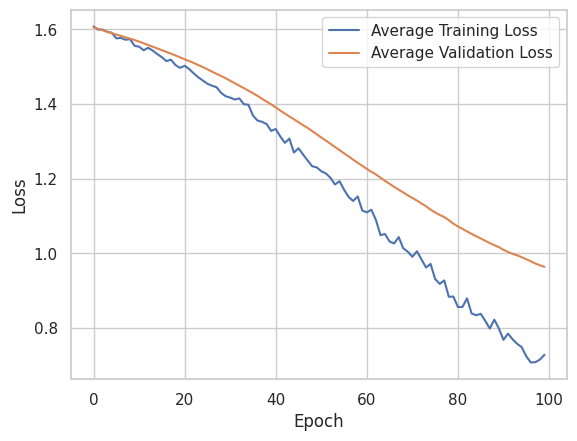

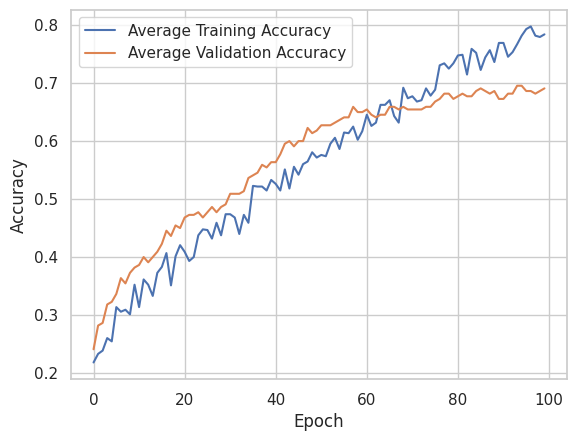

Precision (macro): 0.6810763454317896
Recall (macro): 0.6909090909090909
F1-score (macro): 0.6826728826728827


In [75]:
crossval_5_fitur_BiLSTM(3,'base')

Fold 1
2/2 [==============================] - 1s 5ms/step
Fold 2
2/2 [==============================] - 1s 9ms/step
Fold 3
2/2 [==============================] - 1s 6ms/step
Fold 4
2/2 [==============================] - 1s 6ms/step
Fold 5
2/2 [==============================] - 1s 7ms/step
Cross-Validation Accuracy: 68.64% (+/- 3.91%)


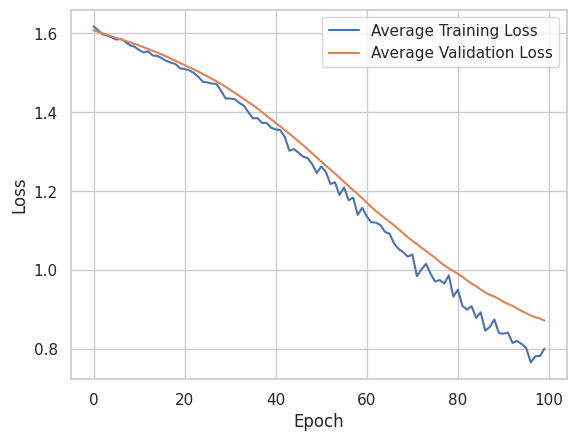

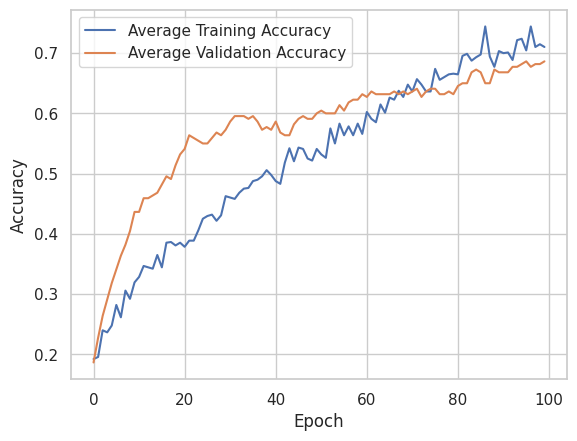

Precision (macro): 0.6653009946619522
Recall (macro): 0.6863636363636363
F1-score (macro): 0.6701179894708308


In [76]:
crossval_5_fitur_BiLSTM(4,'base')


Fold 1
2/2 [==============================] - 1s 9ms/step
Fold 2
2/2 [==============================] - 1s 7ms/step
Fold 3
2/2 [==============================] - 1s 8ms/step
Fold 4
2/2 [==============================] - 1s 8ms/step
Fold 5
2/2 [==============================] - 1s 9ms/step
Cross-Validation Accuracy: 77.69% (+/- 5.91%)


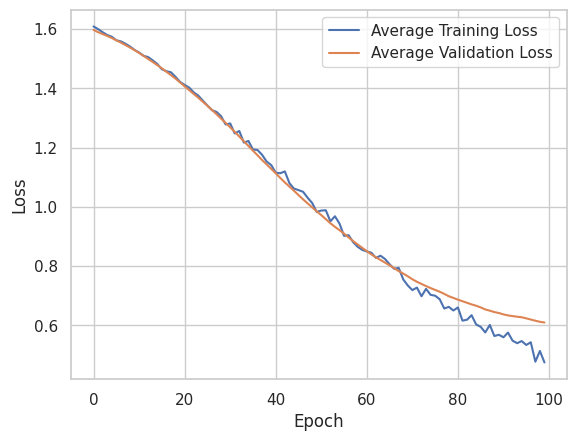

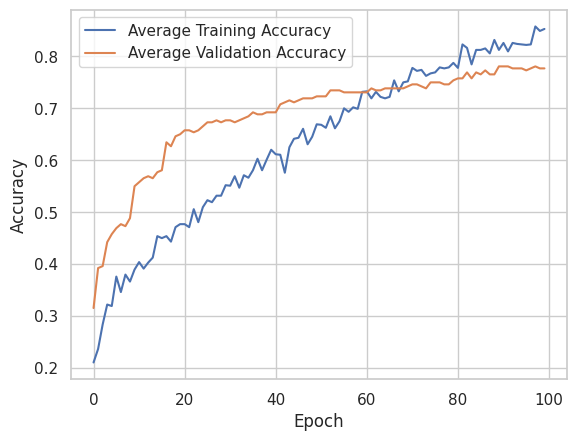

Precision (macro): 0.7620574162679425
Recall (macro): 0.7769230769230768
F1-score (macro): 0.7630214453954436


In [77]:
crossval_5_fitur_BiLSTM(5,'base')

Fold 1
2/2 [==============================] - 1s 6ms/step
Fold 2
2/2 [==============================] - 1s 8ms/step
Fold 3
2/2 [==============================] - 1s 8ms/step
Fold 4
2/2 [==============================] - 1s 6ms/step
Fold 5
2/2 [==============================] - 1s 7ms/step
Cross-Validation Accuracy: 66.67% (+/- 6.72%)


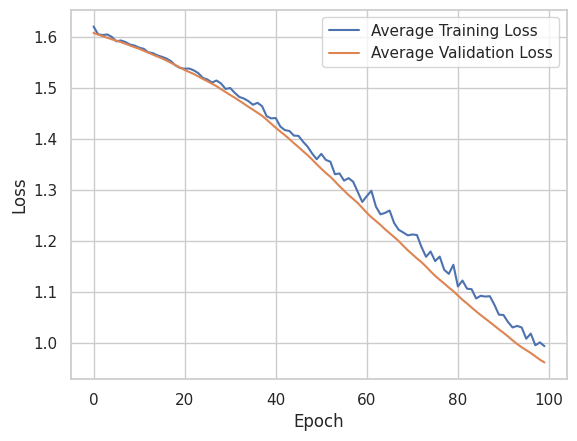

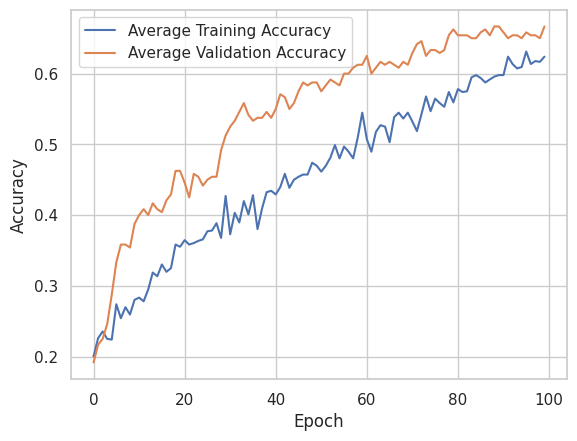

Precision (macro): 0.6378214417842608
Recall (macro): 0.6666666666666667
F1-score (macro): 0.6389621301190181


In [78]:
crossval_5_fitur_BiLSTM(1,'large')

Fold 1
2/2 [==============================] - 1s 8ms/step
Fold 2
2/2 [==============================] - 1s 7ms/step
Fold 3
2/2 [==============================] - 1s 9ms/step
Fold 4
2/2 [==============================] - 1s 7ms/step
Fold 5
2/2 [==============================] - 1s 8ms/step
Cross-Validation Accuracy: 62.61% (+/- 5.57%)


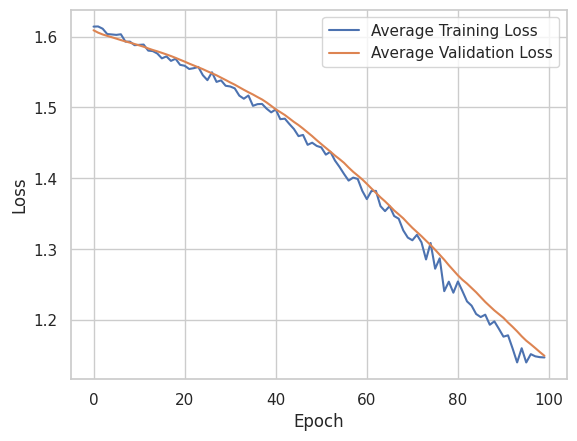

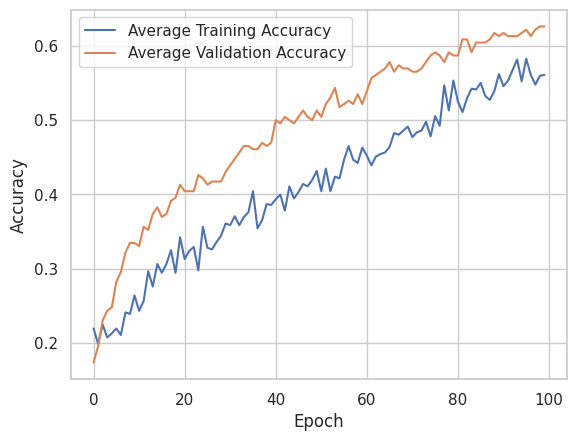

Precision (macro): 0.5934065934065933
Recall (macro): 0.6260869565217392
F1-score (macro): 0.5931867792648777


In [79]:
crossval_5_fitur_BiLSTM(2,'large')

Fold 1
2/2 [==============================] - 1s 7ms/step
Fold 2
2/2 [==============================] - 1s 7ms/step
Fold 3
2/2 [==============================] - 1s 6ms/step
Fold 4
2/2 [==============================] - 1s 9ms/step
Fold 5
2/2 [==============================] - 1s 8ms/step
Cross-Validation Accuracy: 56.36% (+/- 9.02%)


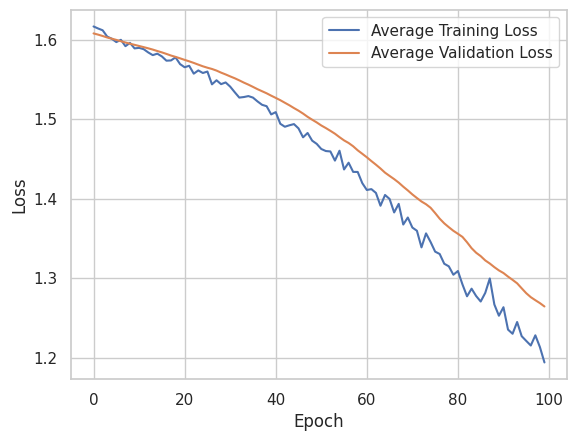

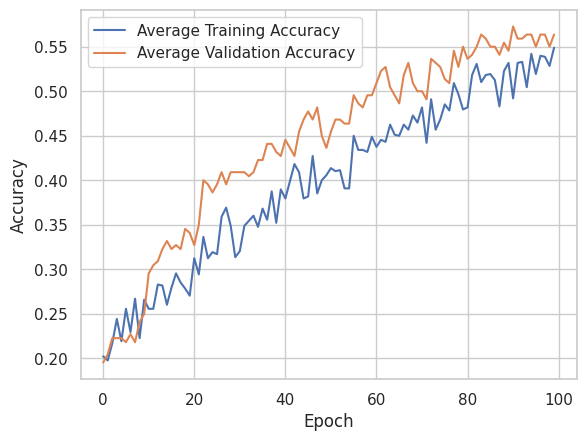

Precision (macro): 0.5537850045167119
Recall (macro): 0.5636363636363637
F1-score (macro): 0.5441869392527972


In [80]:
crossval_5_fitur_BiLSTM(3,'large')

Fold 1
2/2 [==============================] - 1s 8ms/step
Fold 2
2/2 [==============================] - 1s 6ms/step
Fold 3
2/2 [==============================] - 1s 8ms/step
Fold 4
2/2 [==============================] - 1s 11ms/step
Fold 5
2/2 [==============================] - 1s 11ms/step
Cross-Validation Accuracy: 56.36% (+/- 5.06%)


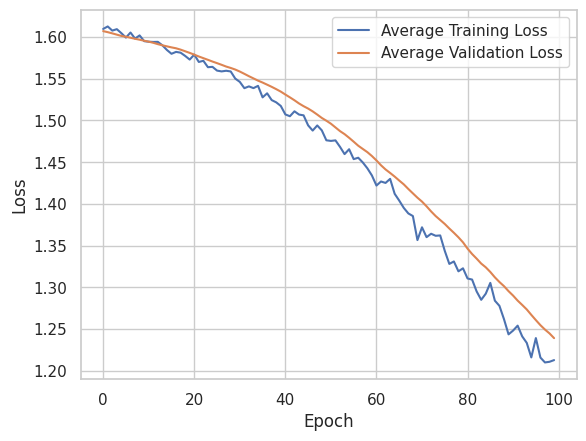

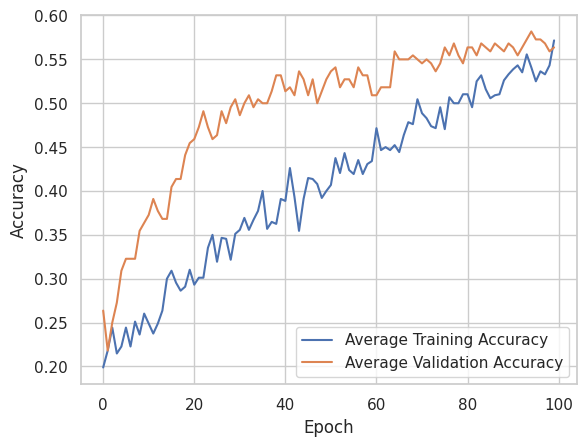

Precision (macro): 0.5287220841388198
Recall (macro): 0.5636363636363637
F1-score (macro): 0.5269929906885913


In [81]:
crossval_5_fitur_BiLSTM(4,'large')

Fold 1
2/2 [==============================] - 1s 10ms/step
Fold 2
2/2 [==============================] - 1s 7ms/step
Fold 3
2/2 [==============================] - 1s 6ms/step
Fold 4
2/2 [==============================] - 1s 8ms/step
Fold 5
2/2 [==============================] - 1s 8ms/step
Cross-Validation Accuracy: 73.08% (+/- 2.72%)


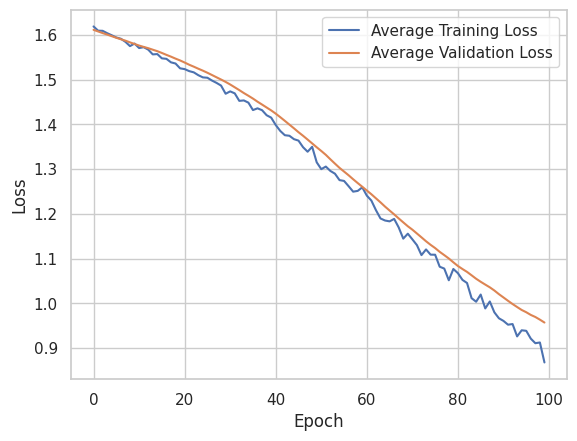

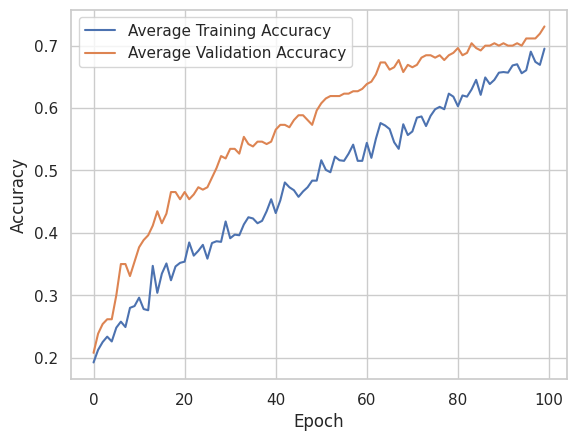

Precision (macro): 0.7343323963285109
Recall (macro): 0.7307692307692308
F1-score (macro): 0.7131467871210851


In [82]:
crossval_5_fitur_BiLSTM(5,'large')

###Konfigurasi Average-GRU

####3 Label

In [ ]:
def crossval_3_fitur_gru(nomor, variasi_BERT):
    # Fungsi untuk membuat model LSTM
    def create_lstm_model(input_shape):
        model = Sequential()
        model.add(GRU(128, input_shape=input_shape, return_sequences=True))
        model.add(GlobalAveragePooling1D())
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(3, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
        return model

    # Data fitur dan target
    column = f"Jawaban Pertanyaan {nomor}_{variasi_BERT}embeddings"
    X = data_embeddings[column].values
    target = f'Jawaban {nomor}_cosine_similarity with Key {nomor}'
    y = cosine_3label[target].values
    panjang_sekuens = len(X[0])
    # Padding data fitur
    X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

    # Reshape data fitur menjadi 2D
    X = X.reshape(X.shape[0], -1)

    # Initialize randomsampling
    randomsampling = RandomOverSampler(random_state=42)

    # Perform oversampling
    X_resampled, y_resampled = randomsampling.fit_resample(X, y)

    # Reshape kembali data fitur menjadi 3D
    X_resampled = X_resampled.reshape(X_resampled.shape[0], panjang_sekuens, -1)

    # Initialize StratifiedKFold with the desired number of folds (e.g., 5)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store accuracy and history for each fold
    fold_accuracies = []
    all_histories = []
    all_y_true = []
    all_y_pred = []
    all_val_accuracies = []  # List to store validation accuracy for each fold

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kfold.split(X_resampled, y_resampled), 1):
        print(f"Fold {fold}")

        X_train, X_val = X_resampled[train_index], X_resampled[test_index]
        y_train, y_val = y_resampled[train_index], y_resampled[test_index]

        model = create_lstm_model(input_shape=(X_resampled.shape[1], X_resampled.shape[2]))

        # Pretraining: Fit model with higher learning rate (pretraining rate)
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val, y_val))  # Include validation data here

        # Evaluate model on validation data for this fold
        y_val_pred = model.predict(X_val)
        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        fold_accuracy = accuracy_score(y_val, y_val_pred_labels)
        fold_accuracies.append(fold_accuracy)

        # Store val_accuracy for this fold
        all_val_accuracies.append(history.history['val_accuracy'])

        all_histories.append(history)
        all_y_true.extend(y_val)
        all_y_pred.extend(y_val_pred_labels)

    # Calculate and print cross-validation results
    print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(fold_accuracies) * 100, np.std(fold_accuracies) * 100))

    # Plot average training and validation loss over all folds
    avg_train_loss = np.mean([history.history['loss'] for history in all_histories], axis=0)
    avg_val_loss = np.mean([history.history['val_loss'] for history in all_histories], axis=0)
    plt.plot(avg_train_loss, label='Average Training Loss')
    plt.plot(avg_val_loss, label='Average Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot average training and validation accuracy over all folds
    avg_train_accuracy = np.mean([history.history['accuracy'] for history in all_histories], axis=0)
    avg_val_accuracy = np.mean(all_val_accuracies, axis=0)  # Take the average of val_accuracies for each fold
    plt.plot(avg_train_accuracy, label='Average Training Accuracy')
    plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Calculate and print precision, recall, and f1-score macro
    precision, recall, f1_score, _ = precision_recall_fscore_support(all_y_true, all_y_pred, average='macro')
    print(f"Precision (macro): {precision}")
    print(f"Recall (macro): {recall}")
    print(f"F1-score (macro): {f1_score}")

    return model

# Usage example


In [ ]:
crossval_3_fitur_gru(1,'base')

In [ ]:
crossval_3_fitur_gru(2,'base')

In [ ]:
crossval_3_fitur_gru(3,'base')

In [ ]:
crossval_3_fitur_gru(4,'base')

In [ ]:
crossval_3_fitur_gru(5,'base')

In [ ]:
crossval_3_fitur_gru(1,'large')

In [ ]:
crossval_3_fitur_gru(2,'large')

In [ ]:
crossval_3_fitur_gru(3,'large')

In [ ]:
crossval_3_fitur_gru(4,'large')

In [ ]:
crossval_3_fitur_gru(5,'large')

####5 Label

In [ ]:
def crossval_5_fitur_gru(nomor, variasi_BERT):
    # Fungsi untuk membuat model LSTM
    def create_lstm_model(input_shape):
        model = Sequential()
        model.add(GRU(128, input_shape=input_shape, return_sequences=True))
        model.add(GlobalAveragePooling1D())
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(5, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
        return model

    # Data fitur dan target
    column = f"Jawaban Pertanyaan {nomor}_{variasi_BERT}embeddings"
    X = data_embeddings[column].values
    target = f'Jawaban {nomor}_cosine_similarity with Key {nomor}'
    y = cosine_5label[target].values
    panjang_sekuens = len(X[0])
    # Padding data fitur
    X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

    # Reshape data fitur menjadi 2D
    X = X.reshape(X.shape[0], -1)

    # Initialize randomsampling
    randomsampling = RandomOverSampler(random_state=42)

    # Perform oversampling
    X_resampled, y_resampled = randomsampling.fit_resample(X, y)

    # Reshape kembali data fitur menjadi 3D
    X_resampled = X_resampled.reshape(X_resampled.shape[0], panjang_sekuens, -1)

    # Initialize StratifiedKFold with the desired number of folds (e.g., 5)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store accuracy and history for each fold
    fold_accuracies = []
    all_histories = []
    all_y_true = []
    all_y_pred = []
    all_val_accuracies = []  # List to store validation accuracy for each fold

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kfold.split(X_resampled, y_resampled), 1):
        print(f"Fold {fold}")

        X_train, X_val = X_resampled[train_index], X_resampled[test_index]
        y_train, y_val = y_resampled[train_index], y_resampled[test_index]

        model = create_lstm_model(input_shape=(X_resampled.shape[1], X_resampled.shape[2]))

        # Pretraining: Fit model with higher learning rate (pretraining rate)
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val, y_val))  # Include validation data here

        # Evaluate model on validation data for this fold
        y_val_pred = model.predict(X_val)
        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        fold_accuracy = accuracy_score(y_val, y_val_pred_labels)
        fold_accuracies.append(fold_accuracy)

        # Store val_accuracy for this fold
        all_val_accuracies.append(history.history['val_accuracy'])

        all_histories.append(history)
        all_y_true.extend(y_val)
        all_y_pred.extend(y_val_pred_labels)

    # Calculate and print cross-validation results
    print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(fold_accuracies) * 100, np.std(fold_accuracies) * 100))

    # Plot average training and validation loss over all folds
    avg_train_loss = np.mean([history.history['loss'] for history in all_histories], axis=0)
    avg_val_loss = np.mean([history.history['val_loss'] for history in all_histories], axis=0)
    plt.plot(avg_train_loss, label='Average Training Loss')
    plt.plot(avg_val_loss, label='Average Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot average training and validation accuracy over all folds
    avg_train_accuracy = np.mean([history.history['accuracy'] for history in all_histories], axis=0)
    avg_val_accuracy = np.mean(all_val_accuracies, axis=0)  # Take the average of val_accuracies for each fold
    plt.plot(avg_train_accuracy, label='Average Training Accuracy')
    plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Calculate and print precision, recall, and f1-score macro
    precision, recall, f1_score, _ = precision_recall_fscore_support(all_y_true, all_y_pred, average='macro')
    print(f"Precision (macro): {precision}")
    print(f"Recall (macro): {recall}")
    print(f"F1-score (macro): {f1_score}")

    return model

In [ ]:
crossval_5_fitur_gru(1,'base')

In [ ]:
crossval_5_fitur_gru(2,'base')

In [ ]:
crossval_5_fitur_gru(3,'base')

In [ ]:
crossval_5_fitur_gru(4,'base')

In [ ]:
crossval_5_fitur_gru(5,'base')

In [ ]:
crossval_5_fitur_gru(1,'large')

In [ ]:
crossval_5_fitur_gru(2,'large')

In [ ]:
crossval_5_fitur_gru(3,'large')

In [ ]:
crossval_5_fitur_gru(4,'large')

In [ ]:
crossval_5_fitur_gru(5,'large')